In [234]:
import numpy as np
from scipy import stats
import pandas as pd
import nltk

import matplotlib.pyplot as plt
# import requests
# import urllib.request
from matplotlib import rc
import seaborn as sns

%matplotlib inline
# %matplotlib nbagg
# import mpld3
# mpld3.enable_notebook()
from matplotlib.axis import Axis 
from matplotlib import interactive
interactive(True)
# %matplotlib qt

# sets the width and height of the plots in inches
plt.rcParams['figure.figsize'] = [10, 5]



from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

In [235]:
tripadv=pd.read_csv('tripadvisor.csv')
tripadv.columns = ['Attraction', 
                   'City', 
                   'Posted', 
                   'Visited', 
                   'User_Reviews', 
                   'User_Helpful',
                   'Review_Helpful', 
                   'Rating', 
                   'Text', 
                   'Title', 
                   'Username', 
                   'User_Location']

In [236]:
tripadv.loc[tripadv.Posted=='8-Jul', :]

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Location
13716,Petersen Automotive Museum,Los Angeles,8-Jul,0,33,14,0,5,Robert Petersen published a lot of the magazin...,Great Stop for All,basicgrandpa,"Clifton, Virginia"
13723,Petersen Automotive Museum,Los Angeles,8-Jul,0,698,101,1,5,"I am NOT AT ALL interested in cars, but I thou...",MUCH better than expected,JdeP,London


In [237]:
tripadv['Posted'] = tripadv['Posted'].apply(lambda x: x.zfill(6))

In [238]:
tripadv['Visited'] = tripadv['Visited'].apply(lambda x: x.zfill(6) if x != '' else None)

In [239]:
tripadv['Posted'] = pd.to_datetime(tripadv['Posted'].astype(str), format='%y-%b')

In [240]:
tripadv.loc[tripadv.Visited=='000000', :]

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Location
2023,The Art Institute of Chicago,Chicago,2019-05-01,000000,125,42,0,5,A day is not enough for the beautiful artifact...,A day is not enough...,CyprusEffie,"Larnaca, Cyprus"
2203,The Art Institute of Chicago,Chicago,2018-09-01,000000,98,26,0,5,I spent several hours here and still didn’t se...,Amazing,eightohtwo,"Burlington, Vermont"
2535,The Art Institute of Chicago,Chicago,2019-07-01,000000,46,33,1,5,Superb quality and impossible to take all of i...,Could return many times to this museum,JS19772017,"Kansas City, Kansas"
2695,The Art Institute of Chicago,Chicago,2020-01-01,000000,5,0,0,5,You must visit this Chicago staple. They have ...,Fantastic.,jules,"Chicago, Illinois"
2797,The Art Institute of Chicago,Chicago,2019-09-01,000000,43,9,0,5,This museum has a great collection of art from...,Great Art Museum,AdamB16,"Iowa City, Iowa"
...,...,...,...,...,...,...,...,...,...,...,...,...
36357,The National 9/11 Memorial & Museum,New York City,2020-02-01,000000,2,0,0,5,My party of six included my aging parents. Guy...,"""The Guy""",Jeff Cole,"Indianapolis, Indiana"
36470,The National 9/11 Memorial & Museum,New York City,2020-02-01,000000,159,54,1,5,The memorial is so moving and beautiful So hea...,A moving must see!,jadehardman1983,"Swinton, United Kingdom"
36621,The National 9/11 Memorial & Museum,New York City,2020-03-01,000000,432,1,3,4,The 9/11 Memorial Museum tour helps give peopl...,The Ideal Learning Experience for Out-of-Towners,Richard L. Entrup,"New York City, New York"
36682,The National 9/11 Memorial & Museum,New York City,2020-06-01,000000,35,73,3,5,This was so beautifully done. From outside at ...,Wow,Jana T,NaN


In [241]:
tripadv['Visited'] = pd.to_datetime(tripadv['Visited'].astype(str), format='%y-%b', errors='coerce')

In [242]:
tripadv.loc[2023,]

Attraction                             The Art Institute of Chicago
City                                                        Chicago
Posted                                          2019-05-01 00:00:00
Visited                                                         NaT
User_Reviews                                                    125
User_Helpful                                                     42
Review_Helpful                                                    0
Rating                                                            5
Text              A day is not enough for the beautiful artifact...
Title                                        A day is not enough...
Username                                                CyprusEffie
User_Location                                       Larnaca, Cyprus
Name: 2023, dtype: object

In [243]:
tripadv.shape

(38294, 12)

In [244]:
tripadv.sample(15)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Location
17989,The Getty Center,Los Angeles,2019-03-01,2018-04-01,17,2,0,5,I had my first date at the Getty Center two ye...,Weekend activity,donnawP6597FQ,NaN
17179,The Getty Center,Los Angeles,2018-07-01,2018-07-01,"5,433",236,0,4,Very impressive modern light stone coloured bu...,You like art? Come.,JohnTripAdviser,"Wirral, United Kingdom"
32770,Cloud Gate,Chicago,2018-09-01,2018-09-01,190,12,0,4,"The Cloud Gate is a very large, very shiny scu...",Interesting sculpture...very unique!,Pete L,"Jefferson City, Missouri"
4431,The Metropolitan Museum of Art,New York City,2020-01-01,2019-12-01,20,5,0,4,A long queue to get in but it was the weekend....,Breakfast & Bag Hat,Chris and Janic... J,"Strahan, Australia"
18430,The Getty Center,Los Angeles,2019-10-01,2018-11-01,99,20,0,5,Well worth the effort to travel to the Getty a...,Not to be Missed!,Angela Y,"Nova Scotia, Canada"
37780,Central Park,New York City,2020-01-01,2019-07-01,31,19,0,5,We attended a wedding reception in the Park on...,Crowded but worth it!,solchasseur,"Santa Barbara, California"
4376,The Metropolitan Museum of Art,New York City,2019-09-01,2019-09-01,2,0,0,5,one of the biggest most beautiful museums i ha...,beautiful museum,AIDEEN,NaN
8742,Top of the Rock,New York City,2019-10-01,2019-10-01,5,5,1,3,Queue after queue - but after getting to the t...,Big views...even bigger queues,WelshCymraes,"Anglesey, United Kingdom"
16919,The Getty Center,Los Angeles,2018-04-01,2018-02-01,54,10,0,5,"Love the Getty. Not just a great museum, but a...",Awesome Museum,NBere,"Sacramento, CA"
22437,Museum of Fine Arts,Boston,2019-09-01,2019-06-01,235,22,0,5,So this place was (for one) a lot bigger then ...,Our visit to the Museum of Fine Arts,segraparanormal1,"Newport, New Hampshire"


In [245]:
# Split up the location column to grab all possible parts of the location

tripadv_loc = tripadv['User_Location'].str.split(', ', expand = True)
tripadv_loc.columns = ['User_Loc1', 'User_Loc2', 'User_Loc3', 'User_Loc4', 'User_Loc5']

tripadv_loc = tripadv_loc.fillna(value='').apply(lambda x: x.astype(str).str.upper())

tripadv = tripadv.drop(labels='User_Location', axis=1)
tripadv = pd.concat([tripadv, tripadv_loc], axis = 1)

tripadv = tripadv.sort_values(['City', 'Attraction'])
tripadv.sample(20)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
35281,The National 9/11 Memorial & Museum,New York City,2019-11-01,2019-11-01,219,56,0,4,We thought the memorial a fitting and moving t...,Fitting tribute,TheClairevH,LONDON,UNITED KINGDOM,,,
6293,Empire State Building,New York City,2019-12-01,2019-12-01,124,8,0,4,You can buy tickets at the building itself. It...,Great!!,Poorni I,ADELAIDE,AUSTRALIA,,,
7956,Top of the Rock,New York City,2019-07-01,2019-07-01,7,1,0,5,"A must see, a must do. The view is Great!! You...","Top of the Rock,fantastic!!",Lizhkkhch,,,,,
26743,Fenway Park,Boston,2018-10-01,2018-09-01,133,30,1,5,What can one add about Fenway! We visited on t...,WOW..... oldest Park in MLB!,Dave Moore,PLANT CITY,FLORIDA,,,
17315,The Getty Center,Los Angeles,2018-08-01,2018-07-01,21,6,0,5,My first time visiting the Getty was awesome! ...,Get to the Getty~,polishedblack,LOS ANGELES,CALIFORNIA,,,
17735,The Getty Center,Los Angeles,2018-12-01,2018-07-01,24,1,0,5,"Great destination, even in the dead of summer....","Great art, and cool views of the ciy.",Jacob B,,,,,
23447,Boston Tea Party Ships & Museum,Boston,2018-06-01,2018-06-01,19,3,0,4,The staff puts on a lively re-enactment of the...,Fun re-enactment,adam3e8,DETROIT,MICHIGAN,,,
13465,Universal Studios Hollywood,Los Angeles,2020-01-01,2019-12-01,3,0,0,5,Had a great day at Universal Studios Hollywood...,Had a blast!,Henry M,SYDNEY,AUSTRALIA,,,
11210,Griffith Observatory,Los Angeles,2019-08-01,2019-08-01,311,50,0,3,I'm giving a low rating due to the difficulty ...,"Very busy, hard to park, but exhibits great fo...",996Chrissy,LINCOLN,UNITED KINGDOM,,,
13595,Universal Studios Hollywood,Los Angeles,2020-02-01,2019-09-01,6,8,1,5,This is a great plae to just let loose and hav...,Fun for the whole family,Peter K,SANTA BARBARA,CALIFORNIA,,,


In [246]:
st_abbr = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

from collections import Counter

st_abbr = {k.upper(): v for k, v in st_abbr.items()}
st_abbr

{'ALABAMA': 'AL',
 'ALASKA': 'AK',
 'AMERICAN SAMOA': 'AS',
 'ARIZONA': 'AZ',
 'ARKANSAS': 'AR',
 'CALIFORNIA': 'CA',
 'COLORADO': 'CO',
 'CONNECTICUT': 'CT',
 'DELAWARE': 'DE',
 'DISTRICT OF COLUMBIA': 'DC',
 'FLORIDA': 'FL',
 'GEORGIA': 'GA',
 'GUAM': 'GU',
 'HAWAII': 'HI',
 'IDAHO': 'ID',
 'ILLINOIS': 'IL',
 'INDIANA': 'IN',
 'IOWA': 'IA',
 'KANSAS': 'KS',
 'KENTUCKY': 'KY',
 'LOUISIANA': 'LA',
 'MAINE': 'ME',
 'MARYLAND': 'MD',
 'MASSACHUSETTS': 'MA',
 'MICHIGAN': 'MI',
 'MINNESOTA': 'MN',
 'MISSISSIPPI': 'MS',
 'MISSOURI': 'MO',
 'MONTANA': 'MT',
 'NEBRASKA': 'NE',
 'NEVADA': 'NV',
 'NEW HAMPSHIRE': 'NH',
 'NEW JERSEY': 'NJ',
 'NEW MEXICO': 'NM',
 'NEW YORK': 'NY',
 'NORTH CAROLINA': 'NC',
 'NORTH DAKOTA': 'ND',
 'NORTHERN MARIANA ISLANDS': 'MP',
 'OHIO': 'OH',
 'OKLAHOMA': 'OK',
 'OREGON': 'OR',
 'PENNSYLVANIA': 'PA',
 'PUERTO RICO': 'PR',
 'RHODE ISLAND': 'RI',
 'SOUTH CAROLINA': 'SC',
 'SOUTH DAKOTA': 'SD',
 'TENNESSEE': 'TN',
 'TEXAS': 'TX',
 'UTAH': 'UT',
 'VERMONT': 'VT',
 '

In [247]:
tripadv['User_Loc2'] = tripadv.User_Loc2.replace(st_abbr)
tripadv

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
0,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,360,186,0,5,We stopped over here on our way to the airport...,Entertaining and Educational,nadiag0610,SAN DIEGO,CA,,,
1,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,174,17,0,5,Who knew committing treason could be fun? From...,History Comes Alive,1TravelNP,GREENSBORO,NC,,,
2,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,31,11,0,5,Loved this. It's great fun and there are some ...,Really well done,Paulrob75,LONDON,UNITED KINGDOM,,,
3,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,44,26,0,5,"Well organised tour, staff very knowledgeable ...",Very informative,budd1965,DERBY,UNITED KINGDOM,,,
4,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,21,2,0,5,This museum is very interactive and extremely ...,Wow!,Kara B,RICHMOND,TX,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34775,Top of the Rock,New York City,2019-10-01,2019-10-01,115,79,1,5,"Visited at 9.30 pm Saturday evening, brilliant...","Great at night,",karen m,STOCKPORT,UNITED KINGDOM,,,
34776,Top of the Rock,New York City,2019-10-01,2019-10-01,19,6,0,4,We went at night time the wait time was not to...,Amazing at night,X5657DYcaroll,DUBLIN,IRELAND,,,
34777,Top of the Rock,New York City,2019-10-01,2019-10-01,242,92,1,5,"We had tickets right away for 8am one morning,...",Really depends on the weather!,AnnmarieK,SAN FRANCISCO,CA,,,
34778,Top of the Rock,New York City,2019-10-01,2019-10-01,30,2,1,4,Beautiful views of NYC. Somewhat pricey for wh...,Top of the Rock,Courtlee86,ST. JOHN'S,CANADA,,,


In [248]:
# creating a separate dataframes for each city

# ta_bos = tripadv.loc[tripadv.City=='Boston',:]
# ta_ord = tripadv.loc[tripadv.City=='Chicago',:]
# ta_lax = tripadv.loc[tripadv.City=='Los Angeles',:]
# ta_jfk = tripadv.loc[tripadv.City=='New York City',:]

## Rating Stats

In [249]:
# Simple stats on whether reviews for each city were marked helpful

tripadv.groupby('City').agg(['sum', 'min', 'max', 'mean', 'std'])['Rating']

,sum,min,max,mean,std
City,,,,,
Boston,46885,1,5,4.695543,0.630302
Chicago,46679,1,5,4.675381,0.668019
Los Angeles,41392,1,5,4.578255,0.792727
New York City,43721,1,5,4.709285,0.698435


In [250]:
# Simple stats on whether reviews for Boston were marked helpful

tripadv[tripadv['City']=='Boston'].groupby('Attraction').agg(['sum', 'min', 'max', 'mean', 'std'])['Rating']

,sum,min,max,mean,std
Attraction,,,,,
Boston Tea Party Ships & Museum,9096,1,5,4.570854,0.744178
Fenway Park,9372,1,5,4.686000,0.711096
Freedom Trail,9398,1,5,4.699000,0.599649
Museum of Fine Arts,9557,1,5,4.790476,0.518668
North End,9462,1,5,4.731000,0.523236


- Below are ratings comparisons between attractions
- The comparisons are between reviews giving 5 stars to the attraction and reviews giving anything less than 4 stars

In [251]:
# change the ratings 1, 2, 3 to 'poor' since there are so few of them

ta_chng_rat = tripadv.replace({'Rating': [1, 2, 3]}, 'Poor')
ta_chng_rat.sample(20)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
1508,Millennium Park,Chicago,2019-12-01,2019-12-01,222,35,2,5,"It is different, artistic and quite millenium....",Park with a Difference,travelwithsachin,DUBAI,UNITED ARAB EMIRATES,,,
25994,North End,Boston,2018-10-01,2018-10-01,193,63,1,5,I loved my half-day food tour here. It’s a lov...,Explore the back lanes and try all the food!,Lin_Sg,SINGAPORE,,,,
20872,Museum of Fine Arts,Boston,2017-04-01,2016-10-01,402,67,0,5,There are free tours and so much to see. Famou...,This is a must see,Terralee P,LONG BEACH,CA,,,
22931,Boston Tea Party Ships & Museum,Boston,2017-07-01,2017-07-01,26,10,0,4,I was on my own and decided to just go to the ...,"Child oriented, but adults can have fun.",Claire R,,,,,
2133,The Art Institute of Chicago,Chicago,2018-10-01,2018-10-01,159,63,0,5,"The AIC is a wonderful place, although it’s ve...",A truly great gallery,Immune2it,BRISBANE,AUSTRALIA,,,
21921,Museum of Fine Arts,Boston,2018-08-01,2017-11-01,5,1,0,5,Huge Museum with so many great exhibits. We en...,Wonderful museum,Skel L,WASHINGTON DC,DC,,,
1940,Millennium Park,Chicago,2019-02-01,2019-02-01,122,8,1,5,"Very beautiful place with nice garden, 2 tall ...",Wonderful place to spend time,Atanu N,BENGALURU,INDIA,,,
22404,Museum of Fine Arts,Boston,2019-08-01,2019-07-01,2,0,0,Poor,Staff was mostly rude and unhelpful. From the ...,Mostly rude staff,Sarah S,,,,,
36986,Central Park,New York City,2019-10-01,2019-03-01,169,15,0,5,Central Park was the highlight of my trip to N...,The best thing about New York,veggiegirlKent,ISLE OF SHEPPEY,UNITED KINGDOM,,,
32809,Cloud Gate,Chicago,2018-10-01,2018-07-01,6,1,0,5,Great location with excellent views of our fan...,The Bean is AWESOME!,Al B,CHICAGO,IL,,,


In [252]:
group_city = ta_chng_rat.groupby('City')
for item in group_city:
    print(item)

('Boston',                             Attraction    City     Posted    Visited  \
0      Boston Tea Party Ships & Museum  Boston 2017-03-01 2017-03-01   
1      Boston Tea Party Ships & Museum  Boston 2017-03-01 2017-03-01   
2      Boston Tea Party Ships & Museum  Boston 2017-03-01 2017-03-01   
3      Boston Tea Party Ships & Museum  Boston 2017-03-01 2017-03-01   
4      Boston Tea Party Ships & Museum  Boston 2017-03-01 2017-03-01   
...                                ...     ...        ...        ...   
34478                        North End  Boston 2017-11-01 2017-10-01   
34480                        North End  Boston 2017-10-01 2017-10-01   
34481                        North End  Boston 2017-11-01 2017-11-01   
34483                        North End  Boston 2017-10-01 2017-09-01   
34485                        North End  Boston 2017-10-01 2017-10-01   

      User_Reviews  User_Helpful  Review_Helpful Rating  \
0              360           186               0      5   
1     

- Total Ratings Count

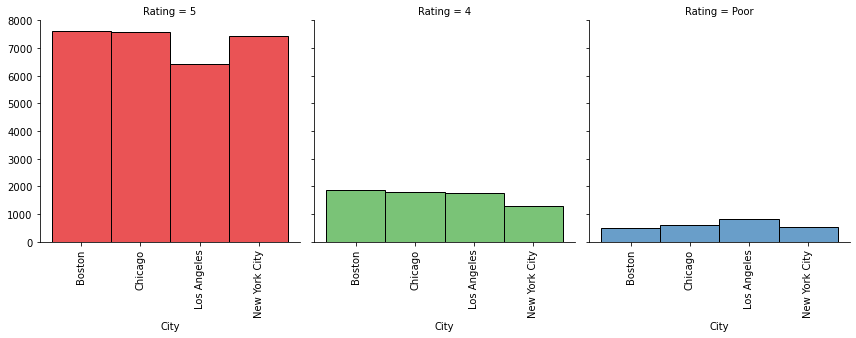

In [253]:
# %matplotlib notebook
ratingsgrid = sns.FacetGrid(data=ta_chng_rat, col='Rating', hue="Rating", palette="Set1", height=4,
                            col_order=ta_chng_rat.Rating.value_counts().index)
ratingsgrid.map(sns.histplot, 'City', kde=False)
ratingsgrid.set_xticklabels(rotation='vertical', fontsize=10)

- Ratings Count broken down by Attraction

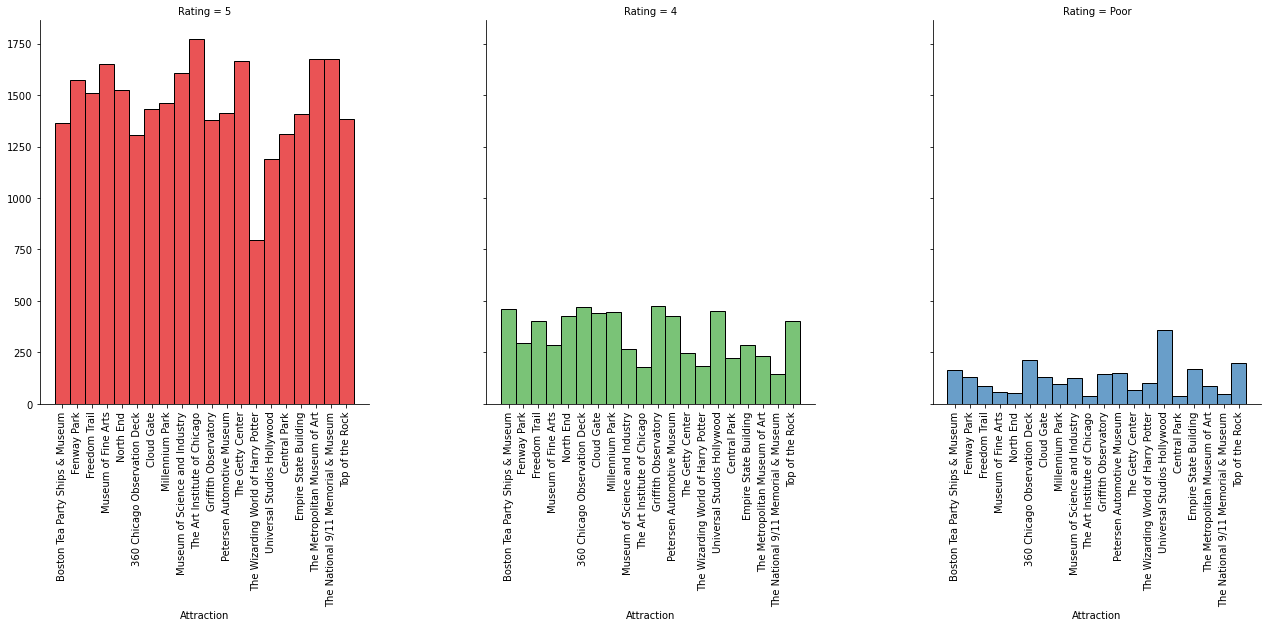

In [254]:
ratingsgrid = sns.FacetGrid(data=ta_chng_rat, col='Rating', hue="Rating", palette="Set1",
                            col_order=ta_chng_rat.Rating.value_counts().index, height=6.25, aspect=1)
ratingsgrid.map(sns.histplot, 'Attraction', kde=False)
ratingsgrid.set_xticklabels(rotation='vertical', fontsize=10)


# Analyzing Boston

### Analyzing by Rating (5 stars, 4 stars, Poor)

In [255]:
ta_5vspoor = ta_chng_rat[(ta_chng_rat['City']=='Boston') ]

ta_5vspoor.sample(20)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
20469,Freedom Trail,Boston,2019-11-01,2019-11-01,16,5,0,4,We started at Boston Commons Park and followed...,Love the Red & Blue Brick Road!,R B,,,,,
19184,Freedom Trail,Boston,2018-10-01,2018-10-01,10,0,0,4,My wife and I really enjoyed following the tra...,Cool Experience,joelfancypants,,,,,
23520,Boston Tea Party Ships & Museum,Boston,2018-07-01,2018-06-01,13,1,0,Poor,We did not actually board the ships but appare...,Boston Tea Party Ships,Pat A,,,,,
25190,North End,Boston,2017-07-01,2017-07-01,87,33,0,4,We wanted to eat some authentic Italian food w...,Lunch while in the area,Karen M,OCALA,,,,
28092,Fenway Park,Boston,2019-10-01,NaT,3,3,0,5,"Great guides, great site and a lot of traditio...",Worth Every Second,Fabio,VINHEDO,SP,,,
26844,Fenway Park,Boston,2018-10-01,2018-10-01,6,2,0,5,Fans and fun! Boston is crowding for the RED S...,Fans and fun,LoveTravel801196,BOSTON,MA,,,
26043,North End,Boston,2018-12-01,2018-11-01,36,12,0,5,Other than the weirdo kids climbing on bronze ...,Quick trip to the Old North Church,SarabethBlairSC,BLAIR SC,,,,
22670,Boston Tea Party Ships & Museum,Boston,2017-05-01,2016-10-01,20,4,0,5,"Well done, Bostonians! This multi-media presen...",Excellent reenactment of the real Tea Partiers,Deutschophile,MCHENRY,IL,,,
23057,Boston Tea Party Ships & Museum,Boston,2017-09-01,2017-09-01,61,30,0,4,"I was really on the fence over the price, but ...",A little Pricey but worth it,ThatGuy,INDIANAPOLIS,IN,,,
22156,Museum of Fine Arts,Boston,2019-01-01,2019-01-01,65,32,0,5,The MFA has playdates for children 4 and under...,Play Date for Under 4,Mason B,BOSTON,MA,,,


## Using Word Lemmatizer to Analyze Text Data

### Single Word Analysis

- 5 Star Analysis

In [384]:
lemmatizer= WordNetLemmatizer()
stop_filters = stopwords.words('english') + list(string.punctuation) + ['boston', '’', "n't", "'s", 'u', 'get', "'m", 
                                                                        'also', '...' ,"'", '`', '``', '-', '"', "''", '""']

# Word Count

corpus_5star = ' '.join(ta_5vspoor[ta_5vspoor['Rating']==5]['Text']).lower()
tokens_5star = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_5star) if tokens not in stop_filters]

fdist_5star = FreqDist(tokens_5star)
fdist_5star.most_common(50)

[('tour', 3361),
 ('great', 3160),
 ('museum', 2426),
 ('history', 2304),
 ('time', 2137),
 ('see', 1937),
 ('trail', 1636),
 ('tea', 1561),
 ('visit', 1560),
 ('day', 1549),
 ('place', 1456),
 ('one', 1454),
 ('well', 1406),
 ('north', 1343),
 ('end', 1308),
 ('art', 1294),
 ('go', 1258),
 ('park', 1249),
 ('walk', 1201),
 ('guide', 1163),
 ('lot', 1134),
 ('restaurant', 1128),
 ('way', 1074),
 ('really', 1066),
 ('fun', 1032),
 ('many', 1021),
 ('good', 1018),
 ('much', 1015),
 ('fenway', 1009),
 ('experience', 1005),
 ('take', 973),
 ('old', 970),
 ('food', 951),
 ('game', 930),
 ('would', 909),
 ('freedom', 897),
 ('worth', 890),
 ('exhibit', 889),
 ('italian', 872),
 ('must', 846),
 ('area', 838),
 ('around', 816),
 ('recommend', 800),
 ('enjoyed', 792),
 ('hour', 774),
 ('collection', 763),
 ('like', 751),
 ('part', 735),
 ('shop', 719),
 ('walking', 719)]

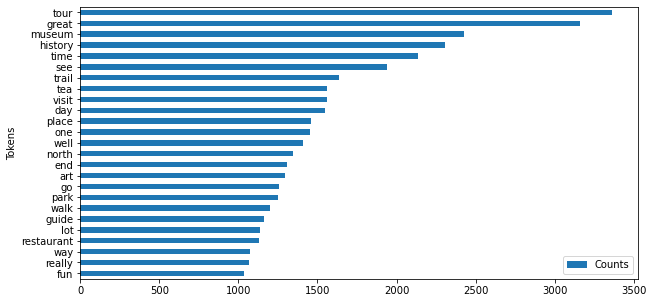

In [385]:
# Graph of Word Count

fdist_5star_graph = pd.DataFrame(fdist_5star.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_5star_graph.invert_yaxis()

- 4 Star Analysis

In [386]:
corpus_4star = ' '.join(ta_5vspoor[ta_5vspoor['Rating']==4]['Text']).lower()
tokens_4star = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_4star) if tokens not in stop_filters]

fdist_4star = FreqDist(tokens_4star)
fdist_4star.most_common(50)

[('tour', 787),
 ('great', 664),
 ('history', 539),
 ('tea', 532),
 ('time', 492),
 ('museum', 486),
 ('see', 470),
 ('trail', 455),
 ('good', 417),
 ('lot', 382),
 ('place', 354),
 ('walk', 353),
 ('visit', 326),
 ('well', 320),
 ('restaurant', 319),
 ('end', 311),
 ('would', 306),
 ('way', 304),
 ('day', 301),
 ('one', 301),
 ('really', 294),
 ('north', 288),
 ('guide', 285),
 ('around', 282),
 ('fun', 276),
 ('take', 263),
 ('area', 256),
 ('go', 252),
 ('party', 251),
 ('old', 248),
 ('park', 248),
 ('freedom', 239),
 ('nice', 238),
 ('worth', 234),
 ('little', 230),
 ('many', 229),
 ('italian', 229),
 ('enjoyed', 224),
 ('experience', 220),
 ('like', 214),
 ('ship', 213),
 ('shop', 212),
 ('walking', 211),
 ('hour', 202),
 ('part', 202),
 ('much', 200),
 ('interesting', 200),
 ('game', 198),
 ('art', 196),
 ('food', 182)]

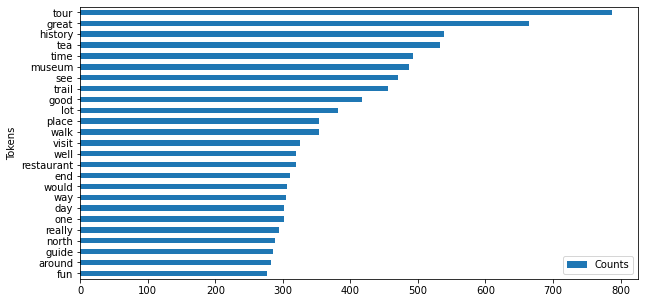

In [387]:
fdist_4star_graph = pd.DataFrame(fdist_4star.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_4star_graph.invert_yaxis()

- Poor Rating Analysis

In [388]:
corpus_poor = ' '.join(ta_5vspoor[ta_5vspoor['Rating']=='Poor']['Text']).lower()
tokens_poor = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_poor) if tokens not in stop_filters]

fdist_poor = FreqDist(tokens_poor)
fdist_poor.most_common(50)

[('tour', 362),
 ('museum', 192),
 ('tea', 153),
 ('would', 151),
 ('time', 134),
 ('see', 125),
 ('history', 117),
 ('good', 116),
 ('one', 115),
 ('go', 109),
 ('guide', 105),
 ('great', 100),
 ('like', 100),
 ('day', 99),
 ('experience', 99),
 ('trail', 96),
 ('park', 95),
 ('people', 94),
 ('really', 89),
 ('u', 85),
 ('place', 83),
 ('ticket', 81),
 ('game', 81),
 ('much', 79),
 ('fenway', 79),
 ('way', 78),
 ('could', 78),
 ('around', 76),
 ('ship', 73),
 ('lot', 73),
 ('visit', 72),
 ('thing', 70),
 ('little', 68),
 ('interesting', 67),
 ('group', 66),
 ('seat', 66),
 ('nice', 64),
 ('walk', 63),
 ('room', 62),
 ('kid', 61),
 ('shop', 58),
 ('went', 57),
 ('stadium', 57),
 ('part', 56),
 ('well', 55),
 ('fan', 55),
 ('actor', 54),
 ('take', 54),
 ('back', 53),
 ('however', 52)]

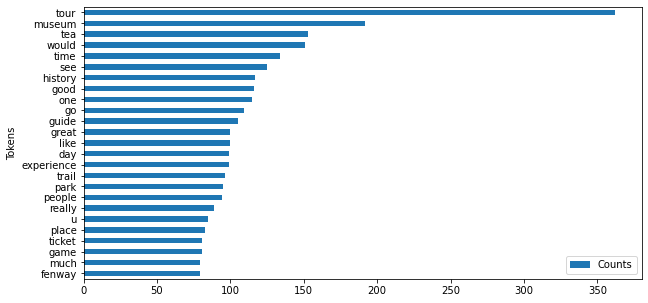

In [389]:
fdist_poor_graph = pd.DataFrame(fdist_poor.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_poor_graph.invert_yaxis()

- We can see that most of the reviews that gave 3 or fewer stars mentioned tours the most

### Bigram Analysis

- 5 Star Analysis

In [390]:
lemmatizer= WordNetLemmatizer()
stop_filters = stopwords.words('english') + list(string.punctuation) + ['boston', '’', "n't", "'s", 'u', "u", 'get', "'m", 
                                                                        'also', '...' ,"'", '`', '-', '"']

corpus_5star = ' '.join(ta_5vspoor[ta_5vspoor['Rating']==5]['Text']).lower()
tokens_5star = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_5star) if tokens not in stop_filters]

bigram_5star = list(nltk.bigrams(tokens_5star))
fdist_bi_5star = FreqDist(bigram_5star)
fdist_bi_5star.most_common(50)

[(('north', 'end'), 983),
 (('freedom', 'trail'), 856),
 (('tea', 'party'), 580),
 (('tour', 'guide'), 471),
 (('paul', 'revere'), 422),
 (('fenway', 'park'), 407),
 (('red', 'sox'), 383),
 (('highly', 'recommend'), 377),
 (('well', 'worth'), 310),
 (('north', 'church'), 301),
 (('green', 'monster'), 264),
 (('baseball', 'fan'), 259),
 (('old', 'north'), 257),
 (('revere', 'house'), 239),
 (('must', 'see'), 236),
 (('italian', 'restaurant'), 230),
 (('gift', 'shop'), 221),
 (('bunker', 'hill'), 214),
 (('great', 'way'), 195),
 (('along', 'way'), 195),
 (('really', 'enjoyed'), 193),
 (('guided', 'tour'), 192),
 (('great', 'place'), 191),
 (('fine', 'art'), 188),
 (('italian', 'food'), 185),
 (('tea', 'room'), 167),
 (('us', 'constitution'), 159),
 (('well', 'done'), 156),
 (('art', 'museum'), 155),
 (('great', 'time'), 153),
 (('much', 'history'), 152),
 (('easy', 'follow'), 149),
 (('year', 'old'), 145),
 (('much', 'see'), 144),
 (('walk', 'around'), 142),
 (('red', 'brick'), 142),
 ((

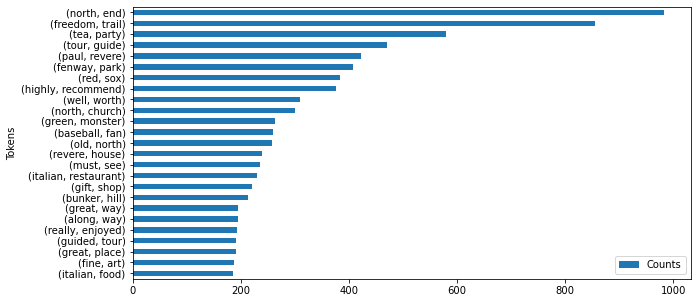

In [391]:
# Graph of 5 Star Bigram

fdist_bi_5star_graph = pd.DataFrame(fdist_bi_5star.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_bi_5star_graph.invert_yaxis()

- 4 Star Analysis

In [392]:
corpus_4star = ' '.join(ta_5vspoor[ta_5vspoor['Rating']==4]['Text']).lower()
tokens_4star = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_4star) if tokens not in stop_filters]

bigram_4star = list(nltk.bigrams(tokens_4star))
fdist_bi_4star = FreqDist(bigram_4star)
fdist_bi_4star.most_common(50)

[(('tea', 'party'), 231),
 (('freedom', 'trail'), 227),
 (('north', 'end'), 215),
 (('paul', 'revere'), 111),
 (('tour', 'guide'), 86),
 (('italian', 'restaurant'), 77),
 (('red', 'sox'), 75),
 (('gift', 'shop'), 66),
 (('revere', 'house'), 63),
 (('great', 'way'), 62),
 (('fenway', 'park'), 61),
 (('north', 'church'), 60),
 (('really', 'enjoyed'), 56),
 (('worth', 'visit'), 55),
 (('well', 'worth'), 54),
 (('old', 'north'), 51),
 (('walk', 'around'), 50),
 (('guided', 'tour'), 49),
 (('red', 'brick'), 49),
 (('along', 'way'), 49),
 (('baseball', 'fan'), 49),
 (('great', 'place'), 47),
 (('green', 'monster'), 44),
 (('would', 'recommend'), 43),
 (('must', 'see'), 41),
 (('little', 'italy'), 41),
 (('bunker', 'hill'), 39),
 (('italian', 'food'), 38),
 (('mike', 'pastry'), 38),
 (('tea', 'room'), 37),
 (('lot', 'history'), 37),
 (('easy', 'follow'), 36),
 (('walking', 'tour'), 35),
 (('great', 'time'), 34),
 (('highly', 'recommend'), 32),
 (('make', 'sure'), 32),
 (('walking', 'around'),

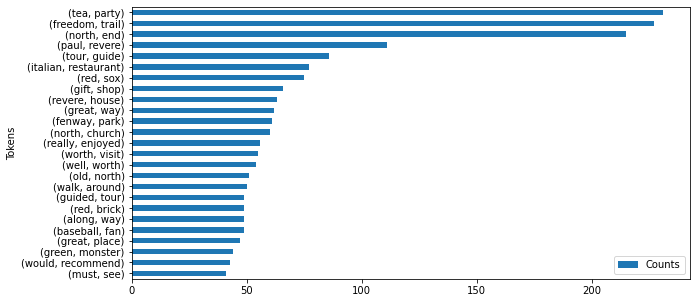

In [393]:
# Graph of 4 Star Bigram

fdist_bi_4star_graph = pd.DataFrame(fdist_bi_4star.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_bi_4star_graph.invert_yaxis()

- Poor Rating Analysis

In [394]:
corpus_poor = ' '.join(ta_5vspoor[ta_5vspoor['Rating']=='Poor']['Text']).lower()
tokens_poor = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_poor) if tokens not in stop_filters]

bigram_poor = list(nltk.bigrams(tokens_poor))
fdist_bi_poor = FreqDist(bigram_poor)
fdist_bi_poor.most_common(50)

[(('tour', 'guide'), 44),
 (('tea', 'party'), 41),
 (('freedom', 'trail'), 36),
 (('gift', 'shop'), 27),
 (('red', 'sox'), 26),
 (('north', 'end'), 22),
 (('tea', 'room'), 19),
 (('green', 'monster'), 17),
 (('guided', 'tour'), 15),
 (('fenway', 'park'), 15),
 (('baseball', 'fan'), 15),
 (('many', 'people'), 13),
 (('paul', 'revere'), 13),
 (('walk', 'around'), 12),
 (('museum', 'experience'), 11),
 (('actor', 'good'), 10),
 (('part', 'tour'), 10),
 (('locker', 'room'), 10),
 (('bunker', 'hill'), 10),
 (('year', 'old'), 9),
 (('ship', 'museum'), 9),
 (('sox', 'fan'), 9),
 (('took', 'u'), 9),
 (('one', 'hour'), 8),
 (('replica', 'ship'), 8),
 (('felt', 'like'), 8),
 (('much', 'better'), 8),
 (('tour', 'group'), 8),
 (('across', 'street'), 8),
 (('must', 'see'), 8),
 (('old', 'north'), 8),
 (('north', 'church'), 8),
 (('easy', 'follow'), 8),
 (('tea', 'box'), 7),
 (('really', 'good'), 7),
 (('ticket', 'online'), 7),
 (('would', 'recommend'), 7),
 (('tea', 'chest'), 7),
 (('tourist', 'tra

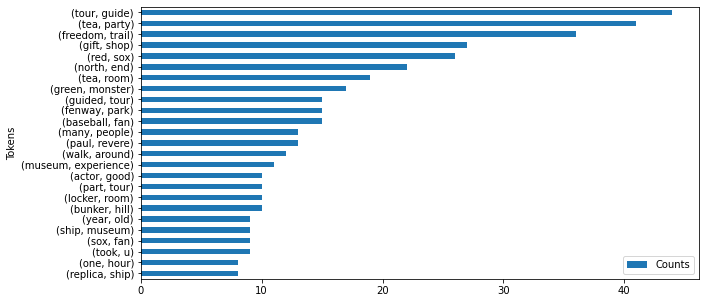

In [395]:
# Graph of Poor Bigram

fdist_bi_poor_graph = pd.DataFrame(fdist_bi_poor.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_bi_poor_graph.invert_yaxis()

- Plot of the top 25 most used words for reviews regarding the top 5 Boston Attractions

- We see some similar words that we saw in the analysis of helpful reviews of Boston's Attractions

- A small sample of the reviews found where the word 'tour' was mentioned in helpful reviews of Boston

In [396]:
bigram_words_5star = [tup[0] for tup in fdist_bi_5star.most_common(50)]
bigram_words_5star

[('north', 'end'),
 ('freedom', 'trail'),
 ('tea', 'party'),
 ('tour', 'guide'),
 ('paul', 'revere'),
 ('fenway', 'park'),
 ('red', 'sox'),
 ('highly', 'recommend'),
 ('well', 'worth'),
 ('north', 'church'),
 ('green', 'monster'),
 ('baseball', 'fan'),
 ('old', 'north'),
 ('revere', 'house'),
 ('must', 'see'),
 ('italian', 'restaurant'),
 ('gift', 'shop'),
 ('bunker', 'hill'),
 ('great', 'way'),
 ('along', 'way'),
 ('really', 'enjoyed'),
 ('guided', 'tour'),
 ('great', 'place'),
 ('fine', 'art'),
 ('italian', 'food'),
 ('tea', 'room'),
 ('us', 'constitution'),
 ('well', 'done'),
 ('art', 'museum'),
 ('great', 'time'),
 ('much', 'history'),
 ('easy', 'follow'),
 ('year', 'old'),
 ('much', 'see'),
 ('walk', 'around'),
 ('red', 'brick'),
 ('little', 'italy'),
 ('museum', 'fine'),
 ('mike', 'pastry'),
 ('one', 'best'),
 ('make', 'sure'),
 ('ball', 'park'),
 ('worth', 'visit'),
 ('great', 'experience'),
 ('american', 'history'),
 ('way', 'see'),
 ('would', 'recommend'),
 ('go', 'back'),
 ('

In [397]:
bigram_words_4star = [tup[0] for tup in fdist_bi_4star.most_common(50)]
bigram_words_4star

[('tea', 'party'),
 ('freedom', 'trail'),
 ('north', 'end'),
 ('paul', 'revere'),
 ('tour', 'guide'),
 ('italian', 'restaurant'),
 ('red', 'sox'),
 ('gift', 'shop'),
 ('revere', 'house'),
 ('great', 'way'),
 ('fenway', 'park'),
 ('north', 'church'),
 ('really', 'enjoyed'),
 ('worth', 'visit'),
 ('well', 'worth'),
 ('old', 'north'),
 ('walk', 'around'),
 ('guided', 'tour'),
 ('red', 'brick'),
 ('along', 'way'),
 ('baseball', 'fan'),
 ('great', 'place'),
 ('green', 'monster'),
 ('would', 'recommend'),
 ('must', 'see'),
 ('little', 'italy'),
 ('bunker', 'hill'),
 ('italian', 'food'),
 ('mike', 'pastry'),
 ('tea', 'room'),
 ('lot', 'history'),
 ('easy', 'follow'),
 ('walking', 'tour'),
 ('great', 'time'),
 ('highly', 'recommend'),
 ('make', 'sure'),
 ('walking', 'around'),
 ('tea', 'overboard'),
 ('year', 'old'),
 ('throwing', 'tea'),
 ('way', 'see'),
 ('party', 'ship'),
 ('well', 'done'),
 ('american', 'history'),
 ('us', 'constitution'),
 ('ship', 'museum'),
 ('throw', 'tea'),
 ('really'

In [398]:
bigram_words_poor = [tup[0] for tup in fdist_bi_poor.most_common(50)]
bigram_words_poor

[('tour', 'guide'),
 ('tea', 'party'),
 ('freedom', 'trail'),
 ('gift', 'shop'),
 ('red', 'sox'),
 ('north', 'end'),
 ('tea', 'room'),
 ('green', 'monster'),
 ('guided', 'tour'),
 ('fenway', 'park'),
 ('baseball', 'fan'),
 ('many', 'people'),
 ('paul', 'revere'),
 ('walk', 'around'),
 ('museum', 'experience'),
 ('actor', 'good'),
 ('part', 'tour'),
 ('locker', 'room'),
 ('bunker', 'hill'),
 ('year', 'old'),
 ('ship', 'museum'),
 ('sox', 'fan'),
 ('took', 'u'),
 ('one', 'hour'),
 ('replica', 'ship'),
 ('felt', 'like'),
 ('much', 'better'),
 ('tour', 'group'),
 ('across', 'street'),
 ('must', 'see'),
 ('old', 'north'),
 ('north', 'church'),
 ('easy', 'follow'),
 ('tea', 'box'),
 ('really', 'good'),
 ('ticket', 'online'),
 ('would', 'recommend'),
 ('tea', 'chest'),
 ('tourist', 'trap'),
 ('time', 'money'),
 ('go', 'back'),
 ('make', 'sure'),
 ('batting', 'practice'),
 ('red', 'brick'),
 ('art', 'museum'),
 ('little', 'italy'),
 ('tea', 'shop'),
 ('people', 'group'),
 ('customer', 'service

In [399]:
bigram_common_words = list(set(bigram_words_5star).intersection(bigram_words_poor))
bigram_common_words = list(set(bigram_common_words).intersection(bigram_words_4star))
bigram_common_words

[('tour', 'guide'),
 ('gift', 'shop'),
 ('north', 'church'),
 ('baseball', 'fan'),
 ('bunker', 'hill'),
 ('north', 'end'),
 ('green', 'monster'),
 ('freedom', 'trail'),
 ('year', 'old'),
 ('paul', 'revere'),
 ('easy', 'follow'),
 ('tea', 'party'),
 ('fenway', 'park'),
 ('red', 'sox'),
 ('would', 'recommend'),
 ('old', 'north'),
 ('red', 'brick'),
 ('walk', 'around'),
 ('make', 'sure'),
 ('little', 'italy'),
 ('must', 'see'),
 ('tea', 'room'),
 ('guided', 'tour')]

In [400]:
words_5star_count = [tup for tup in fdist_bi_5star.most_common(50) if tup[0] in bigram_common_words]
print(len(words_5star_count))

words_5star_count_df = pd.DataFrame(words_5star_count, columns = ['Words', '5Star_Count'])
words_5star_count_df

23


,Words,5Star_Count
0,"(north, end)",983
1,"(freedom, trail)",856
2,"(tea, party)",580
3,"(tour, guide)",471
4,"(paul, revere)",422
5,"(fenway, park)",407
6,"(red, sox)",383
7,"(north, church)",301
8,"(green, monster)",264
9,"(baseball, fan)",259


In [401]:
words_4star_count = [tup for tup in fdist_bi_4star.most_common(50) if tup[0] in bigram_common_words]
print(len(words_4star_count))

words_4star_count_df = pd.DataFrame(words_4star_count, columns = ['Words', '4Star_Count'])
words_4star_count_df

23


,Words,4Star_Count
0,"(tea, party)",231
1,"(freedom, trail)",227
2,"(north, end)",215
3,"(paul, revere)",111
4,"(tour, guide)",86
5,"(red, sox)",75
6,"(gift, shop)",66
7,"(fenway, park)",61
8,"(north, church)",60
9,"(old, north)",51


In [402]:
words_poor_count = [tup for tup in fdist_bi_poor.most_common(50) if tup[0] in bigram_common_words]
print(len(words_poor_count))

words_poor_count_df = pd.DataFrame(words_poor_count, columns = ['Words', 'Poor_Count'])
words_poor_count_df

23


,Words,Poor_Count
0,"(tour, guide)",44
1,"(tea, party)",41
2,"(freedom, trail)",36
3,"(gift, shop)",27
4,"(red, sox)",26
5,"(north, end)",22
6,"(tea, room)",19
7,"(green, monster)",17
8,"(guided, tour)",15
9,"(fenway, park)",15


In [403]:
from functools import reduce

dfs = [words_5star_count_df, words_4star_count_df, words_poor_count_df]

combined_words_df = reduce(lambda left,right: pd.merge(left,right,on='Words'), dfs)
combined_words_df

,Words,5Star_Count,4Star_Count,Poor_Count
0,"(north, end)",983,215,22
1,"(freedom, trail)",856,227,36
2,"(tea, party)",580,231,41
3,"(tour, guide)",471,86,44
4,"(paul, revere)",422,111,13
5,"(fenway, park)",407,61,15
6,"(red, sox)",383,75,26
7,"(north, church)",301,60,8
8,"(green, monster)",264,44,17
9,"(baseball, fan)",259,49,15


In [404]:
count_5star_ttl = len(ta_5vspoor[(ta_5vspoor['Rating']==5)])
count_5star_ttl

7622

In [405]:
count_4star_ttl = len(ta_5vspoor[(ta_5vspoor['Rating']==4)])
count_4star_ttl

1873

In [406]:
count_poor_ttl = len(ta_5vspoor[(ta_5vspoor['Rating']=='Poor')])
count_poor_ttl

490

In [407]:
combined_words_df[['5Star_Count']] = combined_words_df[['5Star_Count']]/count_5star_ttl
combined_words_df

,Words,5Star_Count,4Star_Count,Poor_Count
0,"(north, end)",0.128969,215,22
1,"(freedom, trail)",0.112306,227,36
2,"(tea, party)",0.076096,231,41
3,"(tour, guide)",0.061795,86,44
4,"(paul, revere)",0.055366,111,13
5,"(fenway, park)",0.053398,61,15
6,"(red, sox)",0.050249,75,26
7,"(north, church)",0.039491,60,8
8,"(green, monster)",0.034637,44,17
9,"(baseball, fan)",0.033981,49,15


In [408]:
combined_words_df[['4Star_Count']] = combined_words_df[['4Star_Count']]/count_4star_ttl
combined_words_df

,Words,5Star_Count,4Star_Count,Poor_Count
0,"(north, end)",0.128969,0.114789,22
1,"(freedom, trail)",0.112306,0.121196,36
2,"(tea, party)",0.076096,0.123332,41
3,"(tour, guide)",0.061795,0.045916,44
4,"(paul, revere)",0.055366,0.059263,13
5,"(fenway, park)",0.053398,0.032568,15
6,"(red, sox)",0.050249,0.040043,26
7,"(north, church)",0.039491,0.032034,8
8,"(green, monster)",0.034637,0.023492,17
9,"(baseball, fan)",0.033981,0.026161,15


In [409]:
combined_words_df[['Poor_Count']] = combined_words_df[['Poor_Count']]/count_poor_ttl
combined_words_df

,Words,5Star_Count,4Star_Count,Poor_Count
0,"(north, end)",0.128969,0.114789,0.044898
1,"(freedom, trail)",0.112306,0.121196,0.073469
2,"(tea, party)",0.076096,0.123332,0.083673
3,"(tour, guide)",0.061795,0.045916,0.089796
4,"(paul, revere)",0.055366,0.059263,0.026531
5,"(fenway, park)",0.053398,0.032568,0.030612
6,"(red, sox)",0.050249,0.040043,0.053061
7,"(north, church)",0.039491,0.032034,0.016327
8,"(green, monster)",0.034637,0.023492,0.034694
9,"(baseball, fan)",0.033981,0.026161,0.030612


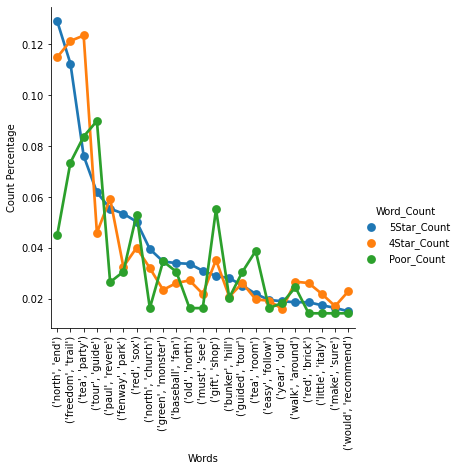

<Figure size 720x360 with 0 Axes>

In [600]:
combined_words_df_plot = combined_words_df.melt('Words', var_name='Word_Count', value_name = 'Count Percentage')
combined_words_df_plot = sns.catplot(x="Words", y="Count Percentage", hue='Word_Count',
                                     data=combined_words_df_plot, kind='point')
plt.figure(figsize=(10,5))
combined_words_df_plot.set_xticklabels(rotation='vertical', fontsize=10)
plt.show()

In [411]:
list(set(bigram_words_5star) - set(bigram_words_4star) - set(bigram_words_poor))

[('fine', 'art'),
 ('great', 'experience'),
 ('one', 'best'),
 ('ball', 'park'),
 ('much', 'see'),
 ('museum', 'fine'),
 ('special', 'exhibit'),
 ('much', 'history')]

In [412]:
list(set(bigram_words_4star) - set(bigram_words_5star) - set(bigram_words_poor))

[('throw', 'tea'),
 ('throwing', 'tea'),
 ('historic', 'site'),
 ('tea', 'overboard'),
 ('walking', 'around'),
 ('lot', 'history'),
 ('faneuil', 'hall')]

In [413]:
# even taking 'u' and "u" out with the lemmatizer does not actually take the letter out

list(set(bigram_words_poor) - set(bigram_words_4star) - set(bigram_words_5star))

[('time', 'money'),
 ('locker', 'room'),
 ('felt', 'like'),
 ('part', 'tour'),
 ('much', 'better'),
 ('tea', 'chest'),
 ('took', 'u'),
 ('batting', 'practice'),
 ('ticket', 'online'),
 ('tea', 'shop'),
 ('many', 'people'),
 ('replica', 'ship'),
 ('tea', 'box'),
 ('one', 'hour'),
 ('actor', 'good'),
 ('museum', 'experience'),
 ('tour', 'group'),
 ('across', 'street'),
 ('people', 'group'),
 ('tourist', 'trap'),
 ('customer', 'service'),
 ('sox', 'fan')]

In [602]:
ta_5vspoor[(ta_5vspoor['Rating']=='Poor') &
           (ta_5vspoor['Text'].str.contains('gift')) &
           (ta_5vspoor['Text'].str.contains('shop'))]

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
22579,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,984,175,0,Poor,Had to to this for our visit to Boston. We had...,Interesting.,tinytrace,BRISTOL,UNITED KINGDOM,,,
22648,Boston Tea Party Ships & Museum,Boston,2017-05-01,2017-04-01,6,3,0,Poor,"The ship is fun to look at, but the ceremony a...",Iced Tea to Drink Rather than Throw in Harbor,KathrynCleveland,CLEVELAND,OH,,,
22649,Boston Tea Party Ships & Museum,Boston,2017-04-01,2017-04-01,34,37,0,Poor,This is run by (for Profit?) Historic Tours of...,Private Company and not worth it,GustavSpeed,DSM,,,,
22705,Boston Tea Party Ships & Museum,Boston,2017-05-01,2017-04-01,283,78,0,Poor,intended to visit the museum but a lot of scho...,More of a place for school trips,Geraldine L,WATFORD,UNITED KINGDOM,,,
22742,Boston Tea Party Ships & Museum,Boston,2017-06-01,2017-06-01,"1,363",483,0,Poor,Ok - you have to go there as it is globally fa...,Had to go!,Honisoiquimalypense,DERBY,UNITED KINGDOM,,,
22811,Boston Tea Party Ships & Museum,Boston,2017-07-01,2017-07-01,6,2,0,Poor,Stay away! I attempted to purchase three items...,Taxation without Representation,RI_Mom_1,WARWICK,RI,,,
22843,Boston Tea Party Ships & Museum,Boston,2017-07-01,2017-07-01,308,78,0,Poor,This was fun to see and would likely be really...,Fun to see.,Michelle2560,MOBILE,AL,,,
22939,Boston Tea Party Ships & Museum,Boston,2017-07-01,2017-07-01,10,1,0,Poor,I wish I could have said I loved every minute ...,More for kids...,Sara H,BALTIMORE,MD,,,
22943,Boston Tea Party Ships & Museum,Boston,2017-08-01,2017-07-01,38,9,0,Poor,We opted for this trip as add on to our trolle...,Good experience about history,TravelJunkie707,ODESSA,FL,,,
22973,Boston Tea Party Ships & Museum,Boston,2017-08-01,2017-07-01,179,84,0,Poor,Booked tickets online through viator. Timed sl...,Boston tea party ship/Museum,yogianddaisy,CROWBOROUGH,UNITED KINGDOM,,,


In [604]:
ta_5vspoor.loc[23023, 'Text']

"Sorry guys but we really didn't like this museum. The role play by actors in costumes was frankly embarrassing (British reserve I guess) and so little history about what actually happened and its significance. We all found the shouty actors irritating after a while, and the one exhibit in the museum just made us laugh - a tea chest on a rotating podium with spotlights, behind glass. Really? The crown jewels in the Tower of London have less fanfare than that. The film was really good though (no shouting) but the talking portraits were frankly silly. The portrayal of King George was laughable and comedic - not suitable for a historic museum and a bit insulting I thought (although understandable given the context I guess). Sorry guys, this place is clearly aimed at a domestic audience and to be fair the US visitors seemed to love it. However we just didn't enjoy it and the whole experience left us cold and irritable. Great gift shop though with the best selection we saw anywhere in Bosto

In [605]:
ta_5vspoor[(ta_5vspoor['Rating']=='Poor') &
           (ta_5vspoor['Attraction']=='Boston Tea Party Ships & Museum') &
           (ta_5vspoor['Text'].str.contains('gift')) &
           (ta_5vspoor['Text'].str.contains('shop'))]

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
22579,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,984,175,0,Poor,Had to to this for our visit to Boston. We had...,Interesting.,tinytrace,BRISTOL,UNITED KINGDOM,,,
22648,Boston Tea Party Ships & Museum,Boston,2017-05-01,2017-04-01,6,3,0,Poor,"The ship is fun to look at, but the ceremony a...",Iced Tea to Drink Rather than Throw in Harbor,KathrynCleveland,CLEVELAND,OH,,,
22649,Boston Tea Party Ships & Museum,Boston,2017-04-01,2017-04-01,34,37,0,Poor,This is run by (for Profit?) Historic Tours of...,Private Company and not worth it,GustavSpeed,DSM,,,,
22705,Boston Tea Party Ships & Museum,Boston,2017-05-01,2017-04-01,283,78,0,Poor,intended to visit the museum but a lot of scho...,More of a place for school trips,Geraldine L,WATFORD,UNITED KINGDOM,,,
22742,Boston Tea Party Ships & Museum,Boston,2017-06-01,2017-06-01,"1,363",483,0,Poor,Ok - you have to go there as it is globally fa...,Had to go!,Honisoiquimalypense,DERBY,UNITED KINGDOM,,,
22811,Boston Tea Party Ships & Museum,Boston,2017-07-01,2017-07-01,6,2,0,Poor,Stay away! I attempted to purchase three items...,Taxation without Representation,RI_Mom_1,WARWICK,RI,,,
22843,Boston Tea Party Ships & Museum,Boston,2017-07-01,2017-07-01,308,78,0,Poor,This was fun to see and would likely be really...,Fun to see.,Michelle2560,MOBILE,AL,,,
22939,Boston Tea Party Ships & Museum,Boston,2017-07-01,2017-07-01,10,1,0,Poor,I wish I could have said I loved every minute ...,More for kids...,Sara H,BALTIMORE,MD,,,
22943,Boston Tea Party Ships & Museum,Boston,2017-08-01,2017-07-01,38,9,0,Poor,We opted for this trip as add on to our trolle...,Good experience about history,TravelJunkie707,ODESSA,FL,,,
22973,Boston Tea Party Ships & Museum,Boston,2017-08-01,2017-07-01,179,84,0,Poor,Booked tickets online through viator. Timed sl...,Boston tea party ship/Museum,yogianddaisy,CROWBOROUGH,UNITED KINGDOM,,,


In [607]:
ta_5vspoor.loc[22648, 'Text']

'The ship is fun to look at, but the ceremony and costumers were quite cheesy. The gift shop is better than average. The employees were great.'

In [608]:
ta_5vspoor.loc[23859, 'Text']

"We didn't pay the $30 for the tour but the gift shop is very good and there are nice views of the ships for photos, bit of a tourist trap and being British we didn't want to take the blame for history !! However it would be great for children to learn the story in this setting and the tour did sound great fun."

In [612]:
ta_5vspoor[(ta_5vspoor['Rating']=='Poor') &
           (ta_5vspoor['Text'].str.contains('tour')) &
           (ta_5vspoor['Text'].str.contains('guide'))].sample(10)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
28097,Fenway Park,Boston,2019-10-01,2019-10-01,34,13,0,Poor,We loved our tours of Wrigley Field and Busch ...,Could Have Been So Much Better,EurekaVic,NOVATO,CA,,,
21879,Museum of Fine Arts,Boston,2018-08-01,2018-08-01,5,0,0,Poor,I often visit museums all over the world. And ...,Not So Fine Experience with Audio Guide,Narae S,,,,,
19432,Freedom Trail,Boston,2019-01-01,2018-12-01,138,34,0,Poor,The tour and the guide were interesting. Dress...,Tour shortened without Explanation but Sites a...,MOTAG87,AUSTIN,TX,,,
24385,Boston Tea Party Ships & Museum,Boston,2019-11-01,2019-10-01,27,8,0,Poor,My wife and I were on a trip to Boston sightse...,Rushed tour with no time to see anything,Tim O,BASINGSTOKE,UNITED KINGDOM,,,
26644,Fenway Park,Boston,2018-09-01,2018-09-01,28,10,0,Poor,Came for a tour at the end of the day and foun...,Great history but rude staff,aYorkshire,,,,,
23392,Boston Tea Party Ships & Museum,Boston,2018-04-01,2018-03-01,157,21,0,Poor,This museum was unique and very informative ab...,Touring Boston with non-English speaking visitors,carib_vacation,BOSTON,MA,,,
19979,Freedom Trail,Boston,2019-07-01,2019-07-01,720,169,0,Poor,This is a fabulous walking tour. Save your mon...,Lovely but falling into disrepair,David B,BRUCE,AUSTRALIA,,,
20613,Freedom Trail,Boston,2020-07-01,2020-07-01,22,2,0,Poor,We walked the Freedom Trail ourselves without ...,Good Activity Amid a Pandemic,Erin H,SILVERHILL,AL,,,
23154,Boston Tea Party Ships & Museum,Boston,2017-10-01,2017-10-01,7,2,0,Poor,I was aware that the visit was partly a tour a...,Great for families,U4551IHemmaj,,,,,
19350,Freedom Trail,Boston,2018-11-01,2018-11-01,56,29,0,Poor,The paid tours are not worth it. The guide spe...,Better to do it on your own,evaldez2014,QUEZON CITY,PHILIPPINES,,,


In [611]:
ta_5vspoor.loc[19768, 'Text']

"The Freedom Trail is a designated pedestrian route through central Boston, which takes you from the Common, through different areas of the town centre, past various landmarks, parks and monuments. Although paid guided tours are available, it can be just done as a self-guided walk. It's a pleasant walk, not too far and a good way to navigate through the city. Unfortunately, while the route itself is well marked by a continuous line on the floor, there are limited information boards or signs to alert you to what the points of interest are. Also, each venue on the route is individually managed and there's no co-ordination between them in terms of ticketing so while each may only be $10-20, for a family of 4 it quickly adds up to $70 plus! We didn't bother, but it was a nice enough walk!"

# Trigram Analysis

In [414]:
# 5 Star Analysis

trigram_5star = list(nltk.trigrams(tokens_5star))
fdist_tri_5star = FreqDist(trigram_5star)
fdist_tri_5star.most_common(50)

[(('old', 'north', 'church'), 251),
 (('paul', 'revere', 'house'), 229),
 (('museum', 'fine', 'art'), 130),
 (('would', 'highly', 'recommend'), 95),
 (('tea', 'party', 'ship'), 80),
 (('red', 'sox', 'fan'), 74),
 (('church', 'paul', 'revere'), 74),
 (('bunker', 'hill', 'monument'), 73),
 (('north', 'church', 'paul'), 66),
 (('well', 'worth', 'visit'), 65),
 (('great', 'way', 'see'), 64),
 (('house', 'old', 'north'), 58),
 (('revere', 'house', 'old'), 57),
 (('party', 'ship', 'museum'), 54),
 (('highly', 'recommend', 'tour'), 54),
 (('follow', 'red', 'brick'), 49),
 (('tea', 'party', 'museum'), 47),
 (('along', 'freedom', 'trail'), 47),
 (('red', 'sox', 'game'), 45),
 (('john', 'singer', 'sargent'), 45),
 (('fenway', 'park', 'tour'), 44),
 (('walking', 'freedom', 'trail'), 43),
 (('tour', 'guide', 'knowledgeable'), 41),
 (('abigail', 'tea', 'room'), 40),
 (('walk', 'freedom', 'trail'), 40),
 (('walked', 'freedom', 'trail'), 40),
 (('wear', 'comfortable', 'shoe'), 37),
 (('throw', 'tea',

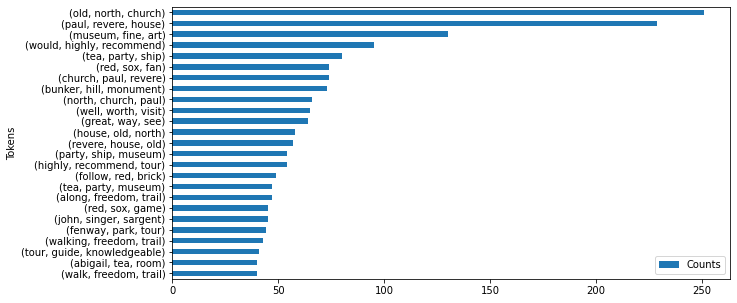

In [415]:
# Graph of 5 Star Trigram

fdist_tri_5star_graph = pd.DataFrame(fdist_tri_5star.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_tri_5star_graph.invert_yaxis()

In [416]:
# 4 Star Analysis

trigram_4star = list(nltk.trigrams(tokens_4star))
fdist_tri_4star = FreqDist(trigram_4star)
fdist_tri_4star.most_common(50)

[(('paul', 'revere', 'house'), 63),
 (('old', 'north', 'church'), 48),
 (('tea', 'party', 'ship'), 28),
 (('museum', 'fine', 'art'), 19),
 (('tea', 'party', 'museum'), 18),
 (('throwing', 'tea', 'overboard'), 17),
 (('well', 'worth', 'visit'), 17),
 (('follow', 'red', 'brick'), 16),
 (('party', 'ship', 'museum'), 14),
 (('bunker', 'hill', 'monument'), 14),
 (('around', 'north', 'end'), 14),
 (('great', 'way', 'see'), 13),
 (('lot', 'italian', 'restaurant'), 12),
 (('learn', 'tea', 'party'), 11),
 (('red', 'sox', 'game'), 11),
 (('freedom', 'trail', 'great'), 11),
 (('church', 'paul', 'revere'), 11),
 (('walk', 'freedom', 'trail'), 11),
 (('revere', 'house', 'old'), 11),
 (('house', 'old', 'north'), 11),
 (('history', 'tea', 'party'), 10),
 (('``', 'tea', "''"), 10),
 (('would', 'highly', 'recommend'), 10),
 (('great', 'way', 'spend'), 10),
 (('tour', 'guide', 'knowledgeable'), 10),
 (('red', 'brick', 'line'), 10),
 (('north', 'end', 'great'), 10),
 (('many', 'italian', 'restaurant'), 1

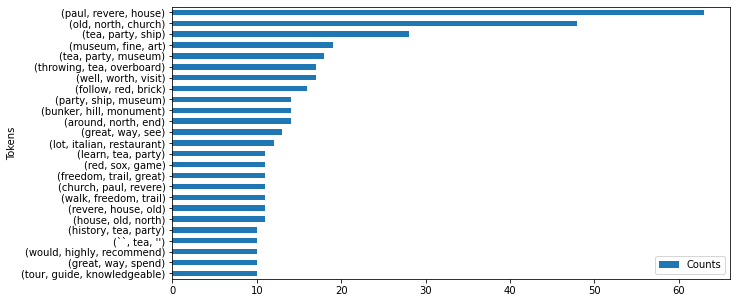

In [417]:
# Graph of 4 Star Trigram

fdist_tri_4star_graph = pd.DataFrame(fdist_tri_4star.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_tri_4star_graph.invert_yaxis()

In [418]:
# Poor Analysis

trigram_poor = list(nltk.trigrams(tokens_poor))
fdist_tri_poor = FreqDist(trigram_poor)
fdist_tri_poor.most_common(50)

[(('old', 'north', 'church'), 8),
 (('tea', 'party', 'ship'), 6),
 (('party', 'ship', 'museum'), 5),
 (('red', 'sox', 'fan'), 5),
 (('paul', 'revere', 'house'), 5),
 (('tea', 'party', 'experience'), 4),
 (('many', 'people', 'tour'), 4),
 (('huge', 'baseball', 'fan'), 4),
 (('visitor', 'locker', 'room'), 4),
 (('top', 'green', 'monster'), 4),
 (('dugout', 'locker', 'room'), 4),
 (('walked', 'freedom', 'trail'), 4),
 (('house', 'old', 'north'), 4),
 (('trail', 'easy', 'follow'), 4),
 (('gift', 'shop', 'tea'), 3),
 (('kid', 'would', 'probably'), 3),
 (('great', 'gift', 'shop'), 3),
 (('``', 'tea', "''"), 3),
 (('waste', 'money', 'tour'), 3),
 (('throwing', 'tea', 'harbor'), 3),
 (('abigail', 'tea', 'room'), 3),
 (('tour', 'gift', 'shop'), 3),
 (('tea', 'party', 'museum'), 3),
 (('“', 'tea', '”'), 3),
 (('waste', 'time', 'money'), 3),
 (('self', 'guided', 'tour'), 3),
 (('revere', 'house', 'old'), 3),
 (('shop', 'tea', 'shop'), 2),
 (('think', 'kid', 'like'), 2),
 (('``', 'museum', "''"), 

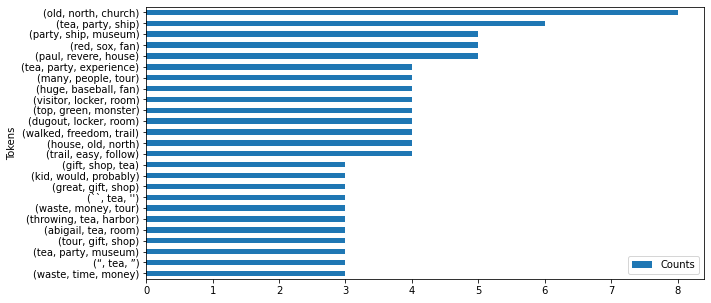

In [419]:
# Graph of Poor Bigram

fdist_tri_poor_graph = pd.DataFrame(fdist_tri_poor.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_tri_poor_graph.invert_yaxis()

In [420]:
trigram_words_5star = [tup[0] for tup in fdist_tri_5star.most_common(50)]
trigram_words_5star

[('old', 'north', 'church'),
 ('paul', 'revere', 'house'),
 ('museum', 'fine', 'art'),
 ('would', 'highly', 'recommend'),
 ('tea', 'party', 'ship'),
 ('red', 'sox', 'fan'),
 ('church', 'paul', 'revere'),
 ('bunker', 'hill', 'monument'),
 ('north', 'church', 'paul'),
 ('well', 'worth', 'visit'),
 ('great', 'way', 'see'),
 ('house', 'old', 'north'),
 ('revere', 'house', 'old'),
 ('party', 'ship', 'museum'),
 ('highly', 'recommend', 'tour'),
 ('follow', 'red', 'brick'),
 ('tea', 'party', 'museum'),
 ('along', 'freedom', 'trail'),
 ('red', 'sox', 'game'),
 ('john', 'singer', 'sargent'),
 ('fenway', 'park', 'tour'),
 ('walking', 'freedom', 'trail'),
 ('tour', 'guide', 'knowledgeable'),
 ('abigail', 'tea', 'room'),
 ('walk', 'freedom', 'trail'),
 ('walked', 'freedom', 'trail'),
 ('wear', 'comfortable', 'shoe'),
 ('throw', 'tea', 'overboard'),
 ('visit', 'north', 'end'),
 ('north', 'end', 'great'),
 ('history', 'tea', 'party'),
 ('tour', 'fenway', 'park'),
 ('love', 'north', 'end'),
 ('would'

In [421]:
trigram_words_4star = [tup[0] for tup in fdist_tri_4star.most_common(50)]
trigram_words_4star

[('paul', 'revere', 'house'),
 ('old', 'north', 'church'),
 ('tea', 'party', 'ship'),
 ('museum', 'fine', 'art'),
 ('tea', 'party', 'museum'),
 ('throwing', 'tea', 'overboard'),
 ('well', 'worth', 'visit'),
 ('follow', 'red', 'brick'),
 ('party', 'ship', 'museum'),
 ('bunker', 'hill', 'monument'),
 ('around', 'north', 'end'),
 ('great', 'way', 'see'),
 ('lot', 'italian', 'restaurant'),
 ('learn', 'tea', 'party'),
 ('red', 'sox', 'game'),
 ('freedom', 'trail', 'great'),
 ('church', 'paul', 'revere'),
 ('walk', 'freedom', 'trail'),
 ('revere', 'house', 'old'),
 ('house', 'old', 'north'),
 ('history', 'tea', 'party'),
 ('``', 'tea', "''"),
 ('would', 'highly', 'recommend'),
 ('great', 'way', 'spend'),
 ('tour', 'guide', 'knowledgeable'),
 ('red', 'brick', 'line'),
 ('north', 'end', 'great'),
 ('many', 'italian', 'restaurant'),
 ('story', 'tea', 'party'),
 ('would', 'definitely', 'recommend'),
 ('walking', 'freedom', 'trail'),
 ('red', 'sox', 'fan'),
 ('trail', 'great', 'way'),
 ('self', '

In [422]:
trigram_words_poor = [tup[0] for tup in fdist_tri_poor.most_common(50)]
trigram_words_poor

[('old', 'north', 'church'),
 ('tea', 'party', 'ship'),
 ('party', 'ship', 'museum'),
 ('red', 'sox', 'fan'),
 ('paul', 'revere', 'house'),
 ('tea', 'party', 'experience'),
 ('many', 'people', 'tour'),
 ('huge', 'baseball', 'fan'),
 ('visitor', 'locker', 'room'),
 ('top', 'green', 'monster'),
 ('dugout', 'locker', 'room'),
 ('walked', 'freedom', 'trail'),
 ('house', 'old', 'north'),
 ('trail', 'easy', 'follow'),
 ('gift', 'shop', 'tea'),
 ('kid', 'would', 'probably'),
 ('great', 'gift', 'shop'),
 ('``', 'tea', "''"),
 ('waste', 'money', 'tour'),
 ('throwing', 'tea', 'harbor'),
 ('abigail', 'tea', 'room'),
 ('tour', 'gift', 'shop'),
 ('tea', 'party', 'museum'),
 ('“', 'tea', '”'),
 ('waste', 'time', 'money'),
 ('self', 'guided', 'tour'),
 ('revere', 'house', 'old'),
 ('shop', 'tea', 'shop'),
 ('think', 'kid', 'like'),
 ('``', 'museum', "''"),
 ('young', 'actor', 'take'),
 ('nice', 'way', 'spend'),
 ('way', 'spend', 'hour'),
 ('would', 'probably', 'really'),
 ('trolley', 'tour', 'decided

In [423]:
trigram_common_words = list(set(trigram_words_5star).intersection(trigram_words_poor))
trigram_common_words = list(set(trigram_common_words).intersection(trigram_words_4star))
trigram_common_words

[('tea', 'party', 'ship'),
 ('``', 'tea', "''"),
 ('house', 'old', 'north'),
 ('abigail', 'tea', 'room'),
 ('tea', 'party', 'museum'),
 ('paul', 'revere', 'house'),
 ('party', 'ship', 'museum'),
 ('revere', 'house', 'old'),
 ('red', 'sox', 'fan'),
 ('self', 'guided', 'tour'),
 ('old', 'north', 'church')]

In [440]:
words_5star_tri_count = [tup for tup in fdist_tri_5star.most_common(50) if tup[0] in trigram_common_words]
print(len(words_5star_tri_count))

words_5star_tri_count_df = pd.DataFrame(words_5star_tri_count, columns = ['Words', '5Star_Count'])
words_5star_tri_count_df

11


,Words,5Star_Count
0,"(old, north, church)",251
1,"(paul, revere, house)",229
2,"(tea, party, ship)",80
3,"(red, sox, fan)",74
4,"(house, old, north)",58
5,"(revere, house, old)",57
6,"(party, ship, museum)",54
7,"(tea, party, museum)",47
8,"(abigail, tea, room)",40
9,"(self, guided, tour)",34


In [441]:
words_4star_tri_count = [tup for tup in fdist_tri_4star.most_common(50) if tup[0] in trigram_common_words]
print(len(words_4star_tri_count))


words_4star_tri_count_df = pd.DataFrame(words_4star_tri_count, columns = ['Words', '4Star_Count'])
words_4star_tri_count_df

11


,Words,4Star_Count
0,"(paul, revere, house)",63
1,"(old, north, church)",48
2,"(tea, party, ship)",28
3,"(tea, party, museum)",18
4,"(party, ship, museum)",14
5,"(revere, house, old)",11
6,"(house, old, north)",11
7,"(``, tea, '')",10
8,"(red, sox, fan)",9
9,"(self, guided, tour)",9


In [442]:
words_poor_tri_count = [tup for tup in fdist_tri_poor.most_common(50) if tup[0] in trigram_common_words]
print(len(words_poor_tri_count))

words_poor_tri_count_df = pd.DataFrame(words_poor_tri_count, columns = ['Words', 'Poor_Count'])
words_poor_tri_count_df

11


,Words,Poor_Count
0,"(old, north, church)",8
1,"(tea, party, ship)",6
2,"(party, ship, museum)",5
3,"(red, sox, fan)",5
4,"(paul, revere, house)",5
5,"(house, old, north)",4
6,"(``, tea, '')",3
7,"(abigail, tea, room)",3
8,"(tea, party, museum)",3
9,"(self, guided, tour)",3


In [443]:
from functools import reduce

tri_dfs = [words_5star_tri_count_df, words_4star_tri_count_df, words_poor_tri_count_df]

combined_words_tri_df = reduce(lambda left,right: pd.merge(left,right,on='Words'), tri_dfs)
combined_words_tri_df

,Words,5Star_Count,4Star_Count,Poor_Count
0,"(old, north, church)",251,48,8
1,"(paul, revere, house)",229,63,5
2,"(tea, party, ship)",80,28,6
3,"(red, sox, fan)",74,9,5
4,"(house, old, north)",58,11,4
5,"(revere, house, old)",57,11,3
6,"(party, ship, museum)",54,14,5
7,"(tea, party, museum)",47,18,3
8,"(abigail, tea, room)",40,7,3
9,"(self, guided, tour)",34,9,3


In [444]:
combined_words_tri_df[['5Star_Count']] = combined_words_tri_df[['5Star_Count']]/count_5star_ttl
combined_words_tri_df[['4Star_Count']] = combined_words_tri_df[['4Star_Count']]/count_5star_ttl
combined_words_tri_df[['Poor_Count']] = combined_words_tri_df[['Poor_Count']]/count_5star_ttl
combined_words_tri_df

,Words,5Star_Count,4Star_Count,Poor_Count
0,"(old, north, church)",0.032931,0.006298,0.001050
1,"(paul, revere, house)",0.030045,0.008266,0.000656
2,"(tea, party, ship)",0.010496,0.003674,0.000787
3,"(red, sox, fan)",0.009709,0.001181,0.000656
4,"(house, old, north)",0.007610,0.001443,0.000525
5,"(revere, house, old)",0.007478,0.001443,0.000394
6,"(party, ship, museum)",0.007085,0.001837,0.000656
7,"(tea, party, museum)",0.006166,0.002362,0.000394
8,"(abigail, tea, room)",0.005248,0.000918,0.000394
9,"(self, guided, tour)",0.004461,0.001181,0.000394


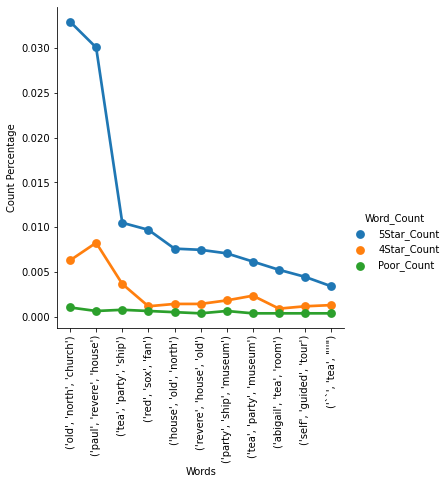

<Figure size 720x360 with 0 Axes>

In [601]:
combined_words_tri_df_plot = combined_words_tri_df.melt('Words', var_name='Word_Count', value_name = 'Count Percentage')
combined_words_tri_df_plot = sns.catplot(x="Words", y="Count Percentage", hue='Word_Count', 
                                         data=combined_words_tri_df_plot, kind='point')
plt.figure(figsize=(10,5))
combined_words_tri_df_plot.set_xticklabels(rotation='vertical', fontsize=10)
plt.show()

In [453]:
trigram_words_5star_only = list(set(trigram_words_5star) - set(trigram_words_4star) - set(trigram_words_poor))
trigram_words_5star_only

[('highly', 'recommend', 'tour'),
 ('well', 'worth', 'time'),
 ('fenway', 'park', 'tour'),
 ('john', 'singer', 'sargent'),
 ('part', 'freedom', 'trail'),
 ('game', 'fenway', 'park'),
 ('great', 'italian', 'restaurant'),
 ('along', 'freedom', 'trail'),
 ('old', 'state', 'house'),
 ('well', 'worth', 'money'),
 ('tour', 'fenway', 'park'),
 ('throw', 'tea', 'overboard'),
 ('wear', 'comfortable', 'shoe'),
 ('love', 'north', 'end')]

In [454]:
trigram_words_4star_only = list(set(trigram_words_4star) - set(trigram_words_5star) - set(trigram_words_poor))
trigram_words_4star_only

[('throw', '``', 'tea'),
 ('freedom', 'trail', 'take'),
 ('reenactment', 'tea', 'party'),
 ('great', 'tour', 'guide'),
 ('many', 'italian', 'restaurant'),
 ('chance', 'throw', 'tea'),
 ('tour', 'tea', 'party'),
 ('story', 'tea', 'party'),
 ('lot', 'italian', 'restaurant'),
 ('little', 'italy', "''"),
 ('learn', 'tea', 'party'),
 ('``', 'little', 'italy'),
 ('trail', 'great', 'way'),
 ('walked', 'north', 'end'),
 ('red', 'brick', 'line'),
 ('throwing', 'tea', 'overboard'),
 ('definitely', 'worth', 'visit')]

In [493]:
trigram_words_poor_only = list(set(trigram_words_poor) - set(trigram_words_5star) - set(trigram_words_4star))
trigram_words_poor_only

[('waste', 'money', 'tour'),
 ('staff', 'friendly', 'helpful'),
 ('waste', 'time', 'money'),
 ('dugout', 'locker', 'room'),
 ('trolley', 'tour', 'decided'),
 ('kid', 'would', 'probably'),
 ('nice', 'way', 'spend'),
 ('actor', 'costume', 'playing'),
 ('tour', 'guide', '``'),
 ('throwing', 'tea', 'harbor'),
 ('many', 'people', 'tour'),
 ('many', 'people', 'group'),
 ('tea', 'party', 'experience'),
 ('young', 'actor', 'take'),
 ('good', 'nice', 'view'),
 ('shop', 'tea', 'shop'),
 ('gift', 'shop', 'neat'),
 ('booked', 'ticket', 'online'),
 ('great', 'gift', 'shop'),
 ('overboard', 'gift', 'shop'),
 ('wall', 'wall', 'people'),
 ('way', 'spend', 'hour'),
 ('tour', 'gift', 'shop'),
 ('tour', 'getting', 'go'),
 ('huge', 'baseball', 'fan'),
 ('would', 'probably', 'really'),
 ('“', 'tea', '”'),
 ('``', 'museum', "''"),
 ('money', 'tea', 'party'),
 ('kid', 'enjoyed', 'throwing'),
 ('gift', 'shop', 'tea'),
 ('visitor', 'locker', 'room'),
 ('tour', 'let', 'u'),
 ('tour', 'guide', 'make'),
 ('think'

In [506]:
# Reviews containing the top trigram for Poor Ratings


ta_5vspoor[(ta_5vspoor['Rating']=='Poor') &
           (ta_5vspoor['Text'].str.contains('waste')) &
           (ta_5vspoor['Text'].str.contains('money')) &
           (ta_5vspoor['Text'].str.contains('tour'))]

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
23454,Boston Tea Party Ships & Museum,Boston,2018-06-01,2018-06-01,146,21,1,Poor,We just completed this tour and were very unde...,Boring....did not meet expectations,Terri H,PHOENIX,AZ,,,
24385,Boston Tea Party Ships & Museum,Boston,2019-11-01,2019-10-01,27,8,0,Poor,My wife and I were on a trip to Boston sightse...,Rushed tour with no time to see anything,Tim O,BASINGSTOKE,UNITED KINGDOM,,,
27624,Fenway Park,Boston,2019-07-01,NaT,2,0,0,Poor,Horrible waste of money. Our tour guide was ni...,$75 tour,Cole E,TWIN FALLS,ID,,,


In [507]:
ta_5vspoor.loc[23454, 'Text']

'We just completed this tour and were very underwhelmed. It was boring throughout and not “high tech” at all. For $100+ for 5 people we were very disappointed. Definitely the low point of our trip to Boston. Thankfully we only wasted an hour of our day. We typically agree with reviews on trip advisor, but this was not one of them. Skip this and do the Duck Tour...totally worth the money.'

In [508]:
ta_5vspoor.loc[24385, 'Text']

'My wife and I were on a trip to Boston sightseeing and was looking forward to visiting this attraction. We paid $59 for both of us and of all the things that we did on our three week trip to New England this was by far the biggest waste of money. The tour starts in a mock up of the Old Meeting house and is conducted by two role playing guides. The whole presentation is aimed at young children - probably 5 to 10 year olds - fair enough but we hoped we would be able to read the info in the exhibits. However, the issue is that everything is rushed and the very few things to read/look at that are in the "museum" you are not given time to take in. When we went out to the boat the guide gave his talk on the top deck and then asked everybody to go down to the next deck where he would continue the tour. There were two sets of stairs going down but we were told we could only use one. We were at the back of a large group, thirty or forty people, and by the time we had filed downstairs the guide

In [509]:
ta_5vspoor.loc[27624, 'Text']

'Horrible waste of money. Our tour guide was nice but had no information and just walked us around which u can do on your own. They put way too many people on 1 tour was not private at all.'

# Analysis of Helpful Reviews

In [431]:
ta_5vspoor_helpful_df = ta_5vspoor[ta_5vspoor['Review_Helpful']>0]
ta_5vspoor_helpful_df.sample(10)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
24689,North End,Boston,2016-11-01,2016-11-01,"1,050",1,1,5,The north end is unique allowing you to browse...,Must visit,bestfamilyadventures,CANADA,,,,
18901,Freedom Trail,Boston,2018-09-01,2018-09-01,159,49,2,5,You can take this trail many different ways. W...,Awesome History lesson!,Kingcrabb65,MARION,IL,,,
19603,Freedom Trail,Boston,2019-04-01,2019-04-01,30,5,1,5,So many favorites along this historic trail. O...,Loved the sites along the trail,Leigh G,GILLETTE,NJ,,,
19661,Freedom Trail,Boston,2019-05-01,2019-05-01,4,7,1,5,I walked the Freedom Trail on my own. It could...,A Great Way to See the City,Kyle N.,WASHINGTON DC,DC,,,
23576,Boston Tea Party Ships & Museum,Boston,2018-07-01,2018-07-01,219,44,1,5,Passed by many times. Found hometown 2 for 1 c...,Fun and educational museum and show,KMHvaca,BOSTON,MA,,,
28244,Fenway Park,Boston,2019-12-01,2019-12-01,83,16,1,4,"If you are a sports fan, even if you don't lik...",Great History,Jane D,YORK,PA,USA,,
19575,Freedom Trail,Boston,2019-04-01,2019-04-01,"1,886",590,2,5,My husband and I spent our first afternoon exp...,A must-do when in Boston,SMO2015,CANADA,,,,
24264,Boston Tea Party Ships & Museum,Boston,2019-09-01,2019-08-01,13,7,1,5,Can't even begin to tell you how much I learne...,Fun history lesson.,B K,NEWFOUNDLAND,CANADA,,,
19652,Freedom Trail,Boston,2019-05-01,2019-05-01,123,33,1,5,We walked the whole 2.5 miles in a couple of h...,Great way to see history,Leaf,,,,,
26046,North End,Boston,2018-11-01,2018-11-01,"2,242",149,1,5,My 2nd time in this area and still exploring i...,The nicest area of Boston,Sarmad K,BLOOMFIELD HILLS,MI,,,


In [517]:
helpful_total = len(ta_5vspoor_helpful_df)
helpful_total

1089

In [518]:
helpful_5star = len(ta_5vspoor_helpful_df[ta_5vspoor_helpful_df['Rating']==5])
helpful_5star

811

In [520]:
helpful_4star = len(ta_5vspoor_helpful_df[ta_5vspoor_helpful_df['Rating']==4])
helpful_4star

188

In [521]:
helpful_poor = len(ta_5vspoor_helpful_df[ta_5vspoor_helpful_df['Rating']=='Poor'])
helpful_poor

90

In [526]:
count_5star_ttl

7622

In [522]:
count_4star_ttl

1873

In [524]:
count_poor_ttl

490

In [527]:
# Helpful reviews that gave 5 stars

helpful_5star/count_5star_ttl

0.10640251902387825

In [528]:
# Helpful reviews that gave 4 stars

helpful_4star/count_4star_ttl

0.1003737319807795

In [529]:
# Helpful reviews that gave 3 or fewer stars

helpful_poor/count_poor_ttl

0.1836734693877551

- It seems that reviews that rated attractions with 3 stars or fewer were more likely to be viewed as helpful

In [535]:
ta_5vspoor_helpful_df[ta_5vspoor_helpful_df['Rating']=='Poor'].sample(10)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
23663,Boston Tea Party Ships & Museum,Boston,2018-08-01,2018-08-01,1,5,4,Poor,This is the feedback I sent to the museum abou...,Perpetuating racism and ignorance,brijean37,MADISON,WI,,,
19156,Freedom Trail,Boston,2018-10-01,2018-09-01,226,40,3,Poor,After reading some other reviewers comments we...,Self Guided Tour,Meritage101,JACKSONVILLE BEACH,FL,,,
20440,Freedom Trail,Boston,2019-11-01,2019-10-01,6,6,1,Poor,Recommend a free guided tour from Natl Forest ...,Historic Trail,Fearless41420782108,,,,,
19162,Freedom Trail,Boston,2018-10-01,2018-10-01,762,541,2,Poor,So far as I can tell the freedom trail has no ...,This isn't really a 'thing'. It's a way to dr...,MarkfromtheIsland,DUNCAN,CANADA,,,
27833,Fenway Park,Boston,2019-08-01,2019-08-01,220,29,1,Poor,"Go for the experience, not for comfort. While ...","Lots of history in this place, but no comfort!",Linda B,WILMINGTON,DE,,,
23450,Boston Tea Party Ships & Museum,Boston,2018-06-01,2018-05-01,31,7,1,Poor,The actors/staff dress in period costume and t...,There is a lot of shouting,Sharyn H,BRISBANE,AUSTRALIA,,,
27640,Fenway Park,Boston,2019-07-01,2019-07-01,10,6,1,Poor,We called Fenway the day of our tour since the...,Wow was that ever confusing!,Cindy P,BOISE,ID,,,
21683,Museum of Fine Arts,Boston,2018-03-01,2018-03-01,516,122,1,Poor,It's a good place to go for those who love to ...,An interesting place to see in Boston,youricat,QUEZON CITY,PHILIPPINES,,,
34510,Boston Tea Party Ships & Museum,Boston,2018-05-01,2018-05-01,128,48,1,Poor,This tour is very pricey compared to other Bos...,Overpriced but cute,4Doc,REGINA,CANADA,,,
26501,Fenway Park,Boston,2018-09-01,2018-08-01,4,3,1,Poor,Tickets for this are available only on the day...,Pre-Game Tour,thishappycamper,NEW YORK,NY,,,


In [531]:
ta_5vspoor_helpful_df.loc[22956, 'Text']

"Aimed at a very low level of intellect, which may be why it is popular. You can take this tour and finish with very little idea of what the event was, what led up to it, or why it turned out to be significant. The only thought that seeps through is that if you are angry over an insignificant tax, it is ok to destroy other people's property. An actress of limited ability plays the role of an actual participant, and conducts the tour, which is not really a museum visit but a replica ship and then a series of rooms with videos. At over $25 a head, this is not a good way to spend your tourist dollar."

In [534]:
ta_5vspoor_helpful_df.loc[22956, 'User_Loc2']

'SPAIN'

In [532]:
ta_5vspoor_helpful_df.loc[23023, 'Text']

"Sorry guys but we really didn't like this museum. The role play by actors in costumes was frankly embarrassing (British reserve I guess) and so little history about what actually happened and its significance. We all found the shouty actors irritating after a while, and the one exhibit in the museum just made us laugh - a tea chest on a rotating podium with spotlights, behind glass. Really? The crown jewels in the Tower of London have less fanfare than that. The film was really good though (no shouting) but the talking portraits were frankly silly. The portrayal of King George was laughable and comedic - not suitable for a historic museum and a bit insulting I thought (although understandable given the context I guess). Sorry guys, this place is clearly aimed at a domestic audience and to be fair the US visitors seemed to love it. However we just didn't enjoy it and the whole experience left us cold and irritable. Great gift shop though with the best selection we saw anywhere in Bosto

In [533]:
ta_5vspoor_helpful_df.loc[23023, 'User_Loc2']

'UNITED KINGDOM'

In [536]:
ta_5vspoor_helpful_df.loc[19156, 'Text']

'After reading some other reviewers comments we decided to do the Freedom Trail without a guide as we were only in Boston for the day and wanted to be able to walk the whole trail from beginning to end. It is a lot of walking so be sure to wear comfortable shoes! I was glad we did not make a reservation in advance as we had problems getting to Boston from the train and took us longer than expected so we would of missed our time so by us doing self guided tour it worked out fine. We started at what we thought was the Boston Common, but some how didn\'t start where we wanted to so had to do some back tracking. We saw what you would of seen if you did the "Walk into History" and "North End" tours. It was nice as we could go at our own pace and take a lot of pictures. If I did it again the next time I would do a guided tour so I got a little more history and understood what I was looking at without having to google it on my phone.'

In [593]:
ta_5vspoor_helpful_df.head()

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
22733,Boston Tea Party Ships & Museum,Boston,2017-06-01,2017-05-01,72,53,1,5,We had a great time learning the history of th...,"Informative history of Boston, well worth a visit",Simon Lewis,BROMLEY,UNITED KINGDOM,,,
22781,Boston Tea Party Ships & Museum,Boston,2017-06-01,2017-06-01,17,15,1,5,We have 8 kids ranging from 6-19 and EVERYONE ...,Best Museum in Boston!!!,jaydeelady,ORANGEVALE,CA,,,
22904,Boston Tea Party Ships & Museum,Boston,2017-07-01,2017-07-01,161,54,1,5,Educational and interactive. My 10 yo son and ...,Cool,Charlieboysmom,,,,,
22936,Boston Tea Party Ships & Museum,Boston,2017-07-01,2017-07-01,147,48,1,4,tried to visit on a busy saturday only to find...,Tried to visit on a busy Saturday,momLofteens,BOSTON,MA,,,
22956,Boston Tea Party Ships & Museum,Boston,2017-08-01,2017-07-01,"1,169",779,1,Poor,"Aimed at a very low level of intellect, which ...",Juvenile,MannyG2000,BARCELONA,SPAIN,,,


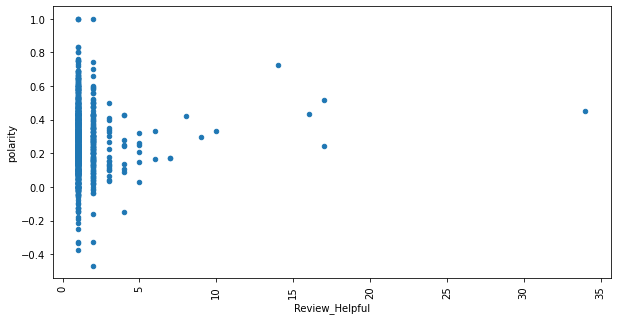

In [595]:
from textblob import TextBlob

sample_size = len(ta_5vspoor_helpful_df)

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

sample = ta_5vspoor_helpful_df.sample(sample_size).apply(sentiment_func, axis=1)
sample.plot.scatter('Review_Helpful', 'polarity').tick_params(axis='x', labelrotation = 90)

- Helpful reviews tend to be more positive

### Analysis of Review Text Polarity of the 20 most helpful users

In [581]:
helpful_users = ta_5vspoor.sort_values(by=['User_Helpful'], ascending = False).head(20)
helpful_users['Username'] = helpful_users['Username'].astype(str)
helpful_users

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
22139,Museum of Fine Arts,Boston,2019-01-01,2018-12-01,"4,905",988,0,5,"To be honest, it was not a planned visit and w...",Wonderful surprise,Dirk W,ALEXANDRA HEADLAND,AUSTRALIA,,,
20974,Museum of Fine Arts,Boston,2017-05-01,2017-04-01,"5,762",987,0,5,In addition to seeing the Art in Bloom display...,Another lovely Art in Bloom!,Nikko4Me,MILFORD,MA,,,
19426,Freedom Trail,Boston,2019-01-01,2018-12-01,"4,905",987,0,4,"Just follow the red brick road, you cannot go ...",Boston best,Dirk W,ALEXANDRA HEADLAND,AUSTRALIA,,,
27259,Fenway Park,Boston,2019-05-01,2019-05-01,"9,552",973,0,5,I was here for an afternoon game. The weather ...,Great park.,LostALot22,CHICAGO,IL,,,
21284,Museum of Fine Arts,Boston,2017-08-01,2017-05-01,"1,038",949,0,4,My spouse and I visited Boston’s Museum of Fin...,Great Permanent Collection and Nice Rotating E...,fluffnfold,PENNSYLVANIA,,,,
23175,Boston Tea Party Ships & Museum,Boston,2017-10-01,2017-10-01,"1,725",919,0,4,This is a great way to get children interested...,Good experience,Sunset92,BROOKLYN,NY,,,
25490,North End,Boston,2017-11-01,2017-10-01,"3,284",917,0,5,It's a beautiful place with great Italian rest...,Maybe the best Little italy in the US,RonL40,UTICA,NY,,,
34559,Museum of Fine Arts,Boston,2017-06-01,2017-06-01,"3,284",917,0,5,"Loved the Matisse, Botticelli and African-Amer...",Beautiful permanent collection. Great Matisse ...,RonL40,UTICA,NY,,,
19642,Freedom Trail,Boston,2019-05-01,2019-05-01,"2,559",904,0,5,The Freedom Trail takes you to about 17 sites ...,Walk it,lucycan,MINNEAPOLIS,MN,,,
26158,North End,Boston,2019-05-01,2019-05-01,"2,559",904,0,5,This is the area to the north of the 93 highwa...,Great area,lucycan,MINNEAPOLIS,MN,,,


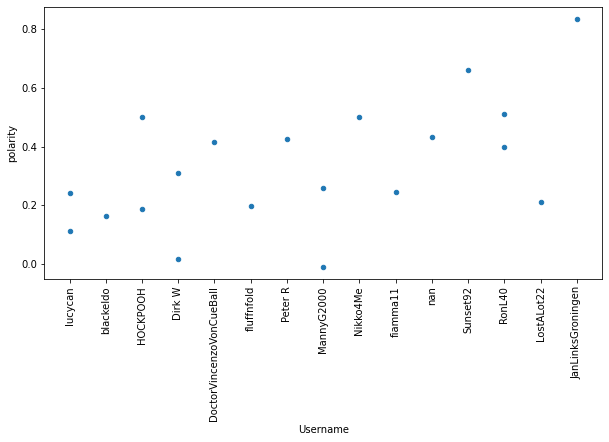

In [587]:
from textblob import TextBlob

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

sample = helpful_users.sample(20).apply(sentiment_func, axis=1)
sample.plot.scatter('Username', 'polarity').tick_params(axis='x', labelrotation = 90)

In [583]:
helpful_users_condensed = helpful_users[helpful_users.columns[[10, 5, 0, 8]]]
helpful_users_condensed

,Username,User_Helpful,Attraction,Text
22139,Dirk W,988,Museum of Fine Arts,"To be honest, it was not a planned visit and w..."
20974,Nikko4Me,987,Museum of Fine Arts,In addition to seeing the Art in Bloom display...
19426,Dirk W,987,Freedom Trail,"Just follow the red brick road, you cannot go ..."
27259,LostALot22,973,Fenway Park,I was here for an afternoon game. The weather ...
21284,fluffnfold,949,Museum of Fine Arts,My spouse and I visited Boston’s Museum of Fin...
23175,Sunset92,919,Boston Tea Party Ships & Museum,This is a great way to get children interested...
25490,RonL40,917,North End,It's a beautiful place with great Italian rest...
34559,RonL40,917,Museum of Fine Arts,"Loved the Matisse, Botticelli and African-Amer..."
19642,lucycan,904,Freedom Trail,The Freedom Trail takes you to about 17 sites ...
26158,lucycan,904,North End,This is the area to the north of the 93 highwa...


### Dirk W's Reviews and polarity assessment

In [590]:
print(helpful_users_condensed.loc[22139, 'Attraction'])
helpful_users_condensed.loc[22139, 'Text']

Museum of Fine Arts


"To be honest, it was not a planned visit and we only learned about this Museum whilst in Boston (the fact that it was free entry from 4pm that day encouraged us even more). But, boy, are we glad we went there ! What a great surprise to find such a huge collection of Dutch Golden Age and French impressionists ! Being European tourists, that's where we spent all of our time ; but we learned later that the American Art displays are even more impressive. So much splendid art, so little time . . . next time, for sure."

In [591]:
print(helpful_users_condensed.loc[19426, 'Attraction'])
helpful_users_condensed.loc[19426, 'Text']

Freedom Trail


"Just follow the red brick road, you cannot go wrong. We walked it several times on our way from Boston Common to a restaurant around Faneuil Hall. Then finally we bought tickets for the guided tour from the kiosk in Boston Common and joined a small group of about 8 people. The tour guide was most informative and entertaining : at $ 12 per person it is a small investment to learn heaps about an important period of Boston's (and America's !) history in a fun way."

# Text Polarity/Basic Sentiment Analysis

In [546]:
from textblob import TextBlob

sample_size = len(ta_5vspoor)

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

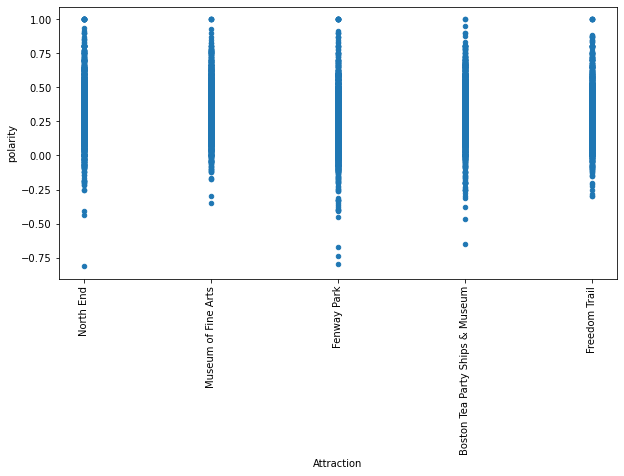

In [540]:
sample = ta_5vspoor.sample(sample_size).apply(sentiment_func, axis=1)
sample.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

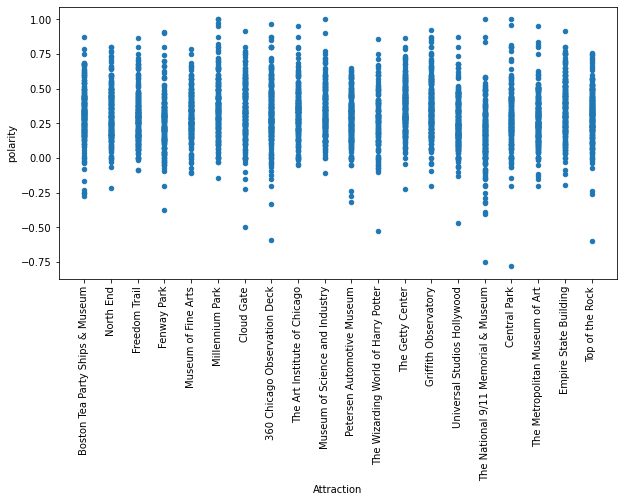

In [544]:
sample = group_city.sample(1000).apply(sentiment_func, axis=1)
sample.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

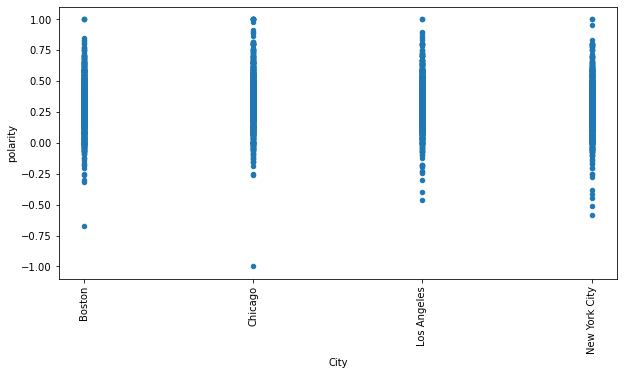

In [548]:
sample = group_city.sample(1000).apply(sentiment_func, axis=1)
sample.plot.scatter('City', 'polarity').tick_params(axis='x', labelrotation = 90)

# Analyzing Rating Based on Month and Year

In [549]:
ta_5vspoor.groupby('Attraction').agg(['count'])['Title']

ta_5vspoor_df = ta_5vspoor.loc[:, ['Visited', 'Rating']]
ta_5vspoor_df.sample(15)

,Visited,Rating
24179,2019-07-01,5
21265,2017-07-01,5
23921,2019-02-01,4
34484,2019-05-01,5
34464,2017-12-01,5
23756,2018-08-01,Poor
27159,2019-04-01,5
23658,2018-06-01,4
22502,2019-11-01,5
23337,2017-10-01,4


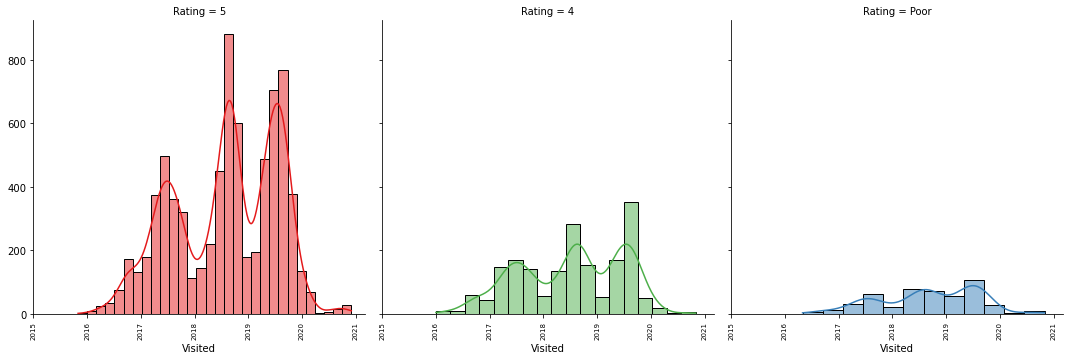

In [337]:
visited_grid = sns.FacetGrid(data=ta_5vspoor_df, col='Rating', hue="Rating", palette="Set1", height=5, 
                             aspect=1, col_order=ta_chng_rat.Rating.value_counts().index)

visited_grid.map(sns.histplot, "Visited", kde=True)

visited_grid.set_xticklabels(rotation='vertical', fontsize=7)

- There seems to be a larger uptick in poor ratings in middle of 2019

### Analyzing Ratings of Specific Attractions

In [318]:
ta_5vspoor_1 = ta_5vspoor[(ta_5vspoor['Attraction']=='Boston Tea Party Ships & Museum')]
ta_5vspoor_1

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
0,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,360,186,0,5,We stopped over here on our way to the airport...,Entertaining and Educational,nadiag0610,SAN DIEGO,CA,,,
1,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,174,17,0,5,Who knew committing treason could be fun? From...,History Comes Alive,1TravelNP,GREENSBORO,NC,,,
2,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,31,11,0,5,Loved this. It's great fun and there are some ...,Really well done,Paulrob75,LONDON,UNITED KINGDOM,,,
3,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,44,26,0,5,"Well organised tour, staff very knowledgeable ...",Very informative,budd1965,DERBY,UNITED KINGDOM,,,
4,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,21,2,0,5,This museum is very interactive and extremely ...,Wow!,Kara B,RICHMOND,TX,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34846,Boston Tea Party Ships & Museum,Boston,2017-11-01,2017-09-01,19,9,0,4,It was informative and fun - had some interest...,Tourism at its highest,AnnaDuke,LAS VEGAS,NV,,,
34849,Boston Tea Party Ships & Museum,Boston,2017-11-01,2017-08-01,78,8,0,4,What a well planned tourist attraction this is...,Take part,Diane A,NUNEATON,UNITED KINGDOM,,,
34851,Boston Tea Party Ships & Museum,Boston,2017-11-01,2017-10-01,15,6,0,5,This museum is an interactive one. The cast as...,History made Fun,Pamela F,BELTON,,,,
34853,Boston Tea Party Ships & Museum,Boston,2017-11-01,2017-10-01,88,8,0,5,Excellent history in an interactive session wi...,Historical entertainment,Lauren P,SURREY,UNITED KINGDOM,,,


In [319]:
ta_5vspoor_1_df = ta_5vspoor_1.loc[:, ['Visited', 'Rating']]
ta_5vspoor_1_df.sample(15)

,Visited,Rating
23499,2018-06-01,5
22958,2017-08-01,5
22721,2017-05-01,4
23127,2017-10-01,5
24298,2019-09-01,5
23593,2018-07-01,5
23760,2018-09-01,5
22860,2017-07-01,Poor
23017,2017-07-01,5
23338,2018-03-01,5


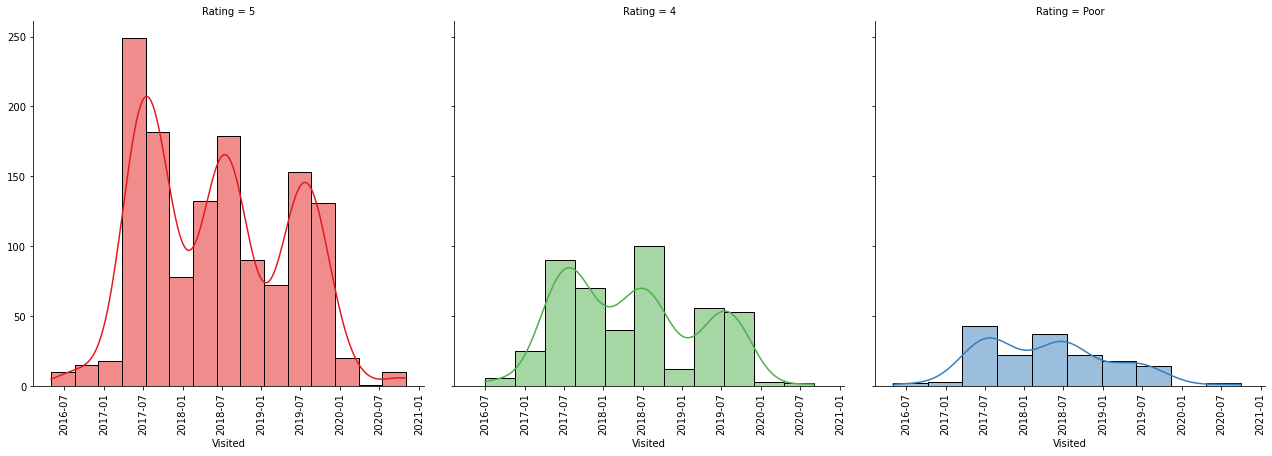

In [320]:
visited_grid_1 = sns.FacetGrid(data=ta_5vspoor_1_df, col='Rating', hue="Rating", palette="Set1", height=6, aspect=1,
                             col_order=ta_chng_rat.Rating.value_counts().index)

visited_grid_1.map(sns.histplot, "Visited", kde=True)

visited_grid_1.set_xticklabels(rotation='vertical', fontsize=10)

- There were fewer poor ratings in the summer/fall of 2019
- This seems to indicate the later reviews may be better overall during the seasonal spike

In [321]:
ta_5vspoor_2 = ta_5vspoor[(ta_5vspoor['Attraction']=='Fenway Park')]
ta_5vspoor_2

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
10,Fenway Park,Boston,2018-08-01,2018-08-01,7,21,0,5,We went on the stadium tour and this was very ...,Great tour experience,morrisonpaul47,DUDLEY,UNITED KINGDOM,,,
11,Fenway Park,Boston,2018-08-01,2018-07-01,7,0,0,5,Absolutely the best seats in the house. Fenway...,Green Monster seats,Linda B,OPPENHEIM,UNITED STATES,,,
12,Fenway Park,Boston,2018-08-01,2018-08-01,17,2,0,5,I hadn’t been back to Fenway Park since I move...,Still the Greatest Place to see MLB,Philip L,LAS VEGAS,NV,,,
13,Fenway Park,Boston,2018-08-01,2018-08-01,37,21,0,Poor,"Lots of shops , live buskers , and street food...",vibrant little area,Tender A,KOBE,JAPAN,,,
14,Fenway Park,Boston,2018-08-01,2018-08-01,74,23,0,5,We went to 2 Yankees Red Sox games here. We lo...,Yankees Red Sox,T W,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34448,Fenway Park,Boston,2018-09-01,2018-09-01,159,28,0,5,We always wanted to go and see the green monst...,On the bucket list,The_Mold_Guy,CALEDON,CANADA,,,
34450,Fenway Park,Boston,2018-09-01,2018-09-01,53,5,0,5,I have been a Sox fan since 7 years old and ha...,3 days in Boston..,JohnnyK14,GRIMSBY,CANADA,,,
34451,Fenway Park,Boston,2018-09-01,2018-09-01,17,2,0,5,"Just like the title says, we lost the game but...","We lost, but great time and game",Ed2553377,GLENVILLE,NY,,,
34454,Fenway Park,Boston,2018-09-01,2018-09-01,53,8,0,5,25 of us flew to Boston specifically to attend...,30 on 30,dale b,NAPERVILLE,IL,,,


In [322]:
ta_5vspoor_2_df = ta_5vspoor_2.loc[:, ['Visited', 'Rating']]
ta_5vspoor_2_df.sample(15)

,Visited,Rating
34417,2018-10-01,5
28194,2019-09-01,5
27433,2019-06-01,5
27378,2019-06-01,5
27989,2019-08-01,5
26671,2018-09-01,5
27937,2019-08-01,5
27284,2019-05-01,5
27920,2019-09-01,5
26695,2018-09-01,5


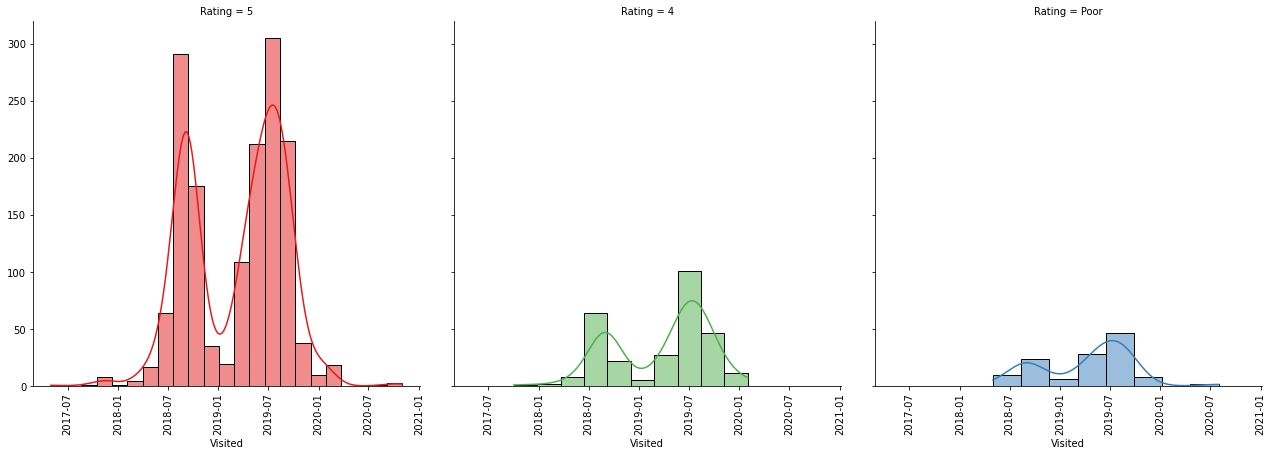

In [323]:
visited_grid_2 = sns.FacetGrid(data=ta_5vspoor_2_df, col='Rating', hue="Rating", palette="Set1", height=6, aspect=1,
                             col_order=ta_chng_rat.Rating.value_counts().index)

visited_grid_2.map(sns.histplot, "Visited", kde=True)

visited_grid_2.set_xticklabels(rotation='vertical', fontsize=10)

- Based on what we can see from the poor ratings histogram from Fenway Park, we may be able to conjecture that the significant increase in poor ratings in Boston was caused by this uptake

In [324]:
ta_5vspoor_3 = ta_5vspoor[(ta_5vspoor['Attraction']=='Freedom Trail')]
ta_5vspoor_3

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
15,Freedom Trail,Boston,2018-08-01,2018-07-01,176,6,0,5,"I love history, so I found out about the Freed...",A blast from the past,Brent N,METAIRIE,LA,,,
16,Freedom Trail,Boston,2018-08-01,2018-07-01,470,20,1,5,I've wanted to do this for a long time and fin...,A must do when visiting Boston.,MyGeeklings,,,,,
17,Freedom Trail,Boston,2018-08-01,2018-07-01,46,19,0,5,This was a great walking tour. We could go at ...,Amazing history,Sandra K,SPRINGFIELD,MO,,,
18,Freedom Trail,Boston,2018-08-01,2018-08-01,3,0,0,5,Isaiah Thomas was the best tour I have ever ha...,Best tour ever,Travis R,,,,,
19,Freedom Trail,Boston,2018-08-01,2018-07-01,116,37,2,5,"There are many reviews, so I’ll keep it brief....",History of America,Chateau Believe,BIG BEAR REGION,CA,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34842,Freedom Trail,Boston,2019-09-01,2019-08-01,97,39,0,5,A must-do for anyone into the historical aspec...,Did only part- but worth it!,910dianel,HARRISBURG,PA,,,
34844,Freedom Trail,Boston,2019-09-01,2019-08-01,42,13,0,5,You will learn a lot about American history......,A must do in Boston,Laurahill269,PITTSBURGH,PA,,,
34847,Freedom Trail,Boston,2019-09-01,2019-08-01,750,91,0,5,The Freedom Trail was a great history lesson o...,History Lesson,HNBISOFF,BEDFORD,TX,,,
34850,Freedom Trail,Boston,2019-09-01,2019-08-01,19,1,0,4,I wanted to visit Boston to see historical lan...,"Wanted history, got history.",Chris,IDAHO,,,,


In [325]:
ta_5vspoor_3_df = ta_5vspoor_3.loc[:, ['Visited', 'Rating']]
ta_5vspoor_3_df.sample(15)

,Visited,Rating
18887,2018-08-01,5
18801,2018-07-01,5
20478,2019-11-01,4
19151,2018-09-01,5
19946,2019-07-01,Poor
19,2018-07-01,5
20172,2019-09-01,5
20606,2020-03-01,4
19183,2018-10-01,5
20128,2019-07-01,4


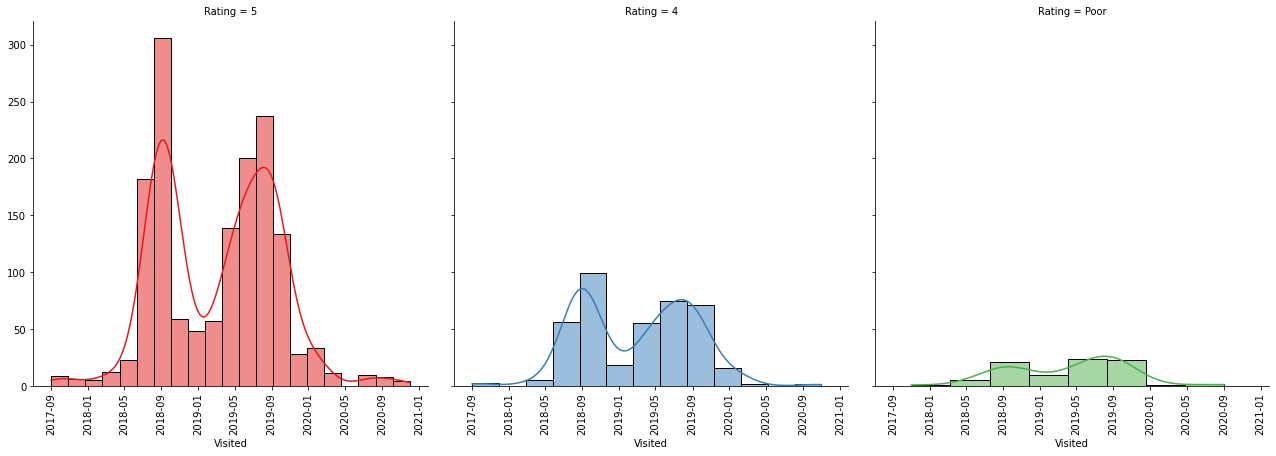

In [326]:
visited_grid_3 = sns.FacetGrid(data=ta_5vspoor_3_df, col='Rating', hue="Rating", palette="Set1", height=6, aspect=1,
                             col_order=ta_chng_rat.Rating.value_counts().index)

visited_grid_3.map(sns.histplot, "Visited", kde=True)

visited_grid_3.set_xticklabels(rotation='vertical', fontsize=10)

In [327]:
ta_5vspoor_4 = ta_5vspoor[(ta_5vspoor['Attraction']=='Museum of Fine Arts')]
ta_5vspoor_4

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
1990,Museum of Fine Arts,Boston,2016-12-01,2016-12-01,40,2,0,5,We visit the museum monthly and are always ple...,A great museum--period,M1786GJjosephc,BRAINTREE,MA,UNITED STATES,,
1991,Museum of Fine Arts,Boston,2016-12-01,2016-12-01,70,14,0,5,This one of the reasons Boston is a first clas...,A TREASURE,grandmeggy,ORLEANS,MA,,,
1992,Museum of Fine Arts,Boston,2016-12-01,2016-11-01,4,1,0,5,교통도 편하고 볼 작품이 많았음. 작품이 많아 충분한 시간을 가지고 가는 것이 좋을...,Great!!!,Sammy J,,,,,
1993,Museum of Fine Arts,Boston,2016-12-01,2016-12-01,2,1,0,5,Went to school in Boston and I would spend aft...,One of my favorite places in Boston,thatyoungtraveler,BOSTON,MA,,,
1994,Museum of Fine Arts,Boston,2016-12-01,2016-10-01,31,13,0,5,My only complaint was that I did not have time...,This is a world class facility,DAVID P,BRITISH COLUMBIA,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34589,Museum of Fine Arts,Boston,2017-02-01,2017-02-01,24,18,0,5,"I like the new member plans; however, I wish t...",Always Perfect,ladyselena,BOSTON,MA,,,
34591,Museum of Fine Arts,Boston,2017-02-01,2017-02-01,952,342,0,5,Just a phenomenal museum with a diverse and ec...,Few if any are better,HonestMcHonest,DENVER,CO,,,
34593,Museum of Fine Arts,Boston,2017-02-01,2016-07-01,"3,484",658,0,5,Outside the main entrance is a striking sculpt...,Magnificent range of exhibitions 5,Lavarcham,LONDON,UNITED KINGDOM,,,
34596,Museum of Fine Arts,Boston,2017-02-01,2016-12-01,261,85,0,4,I wish we had more time to spend in it but the...,Nice way to spend a cold afternoon,TousPourUn,MIAMI,FL,,,


In [328]:
ta_5vspoor_4_df = ta_5vspoor_4.loc[:, ['Visited', 'Rating']]
ta_5vspoor_4_df.sample(15)

,Visited,Rating
21730,2018-04-01,5
21119,2017-06-01,5
20744,2017-02-01,5
22565,2020-02-01,Poor
21142,2017-07-01,4
22495,2019-11-01,5
21288,2017-08-01,5
20755,2017-02-01,5
21835,2018-07-01,5
21617,2018-02-01,5


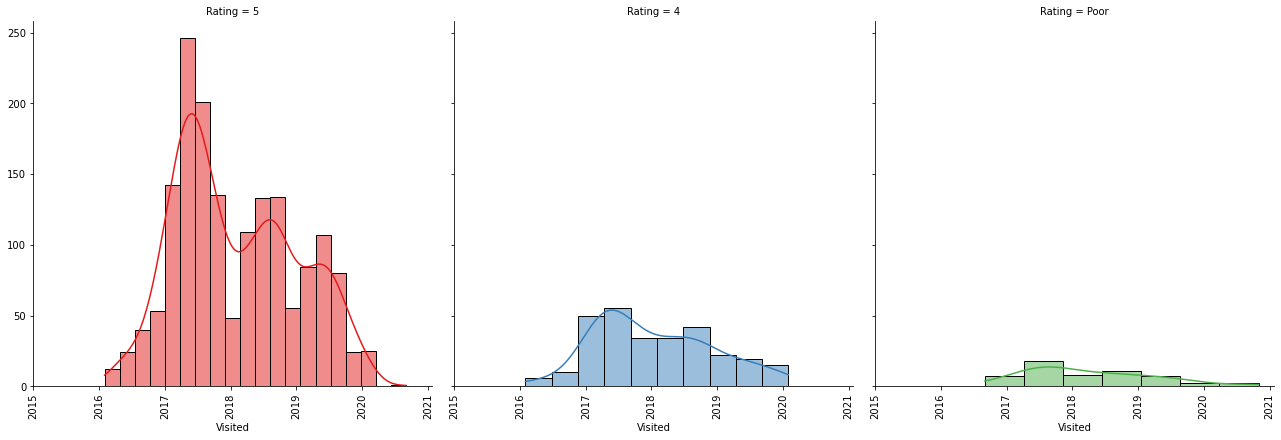

In [329]:
visited_grid_4 = sns.FacetGrid(data=ta_5vspoor_4_df, col='Rating', hue="Rating", palette="Set1", height=6, aspect=1,
                             col_order=ta_chng_rat.Rating.value_counts().index)

visited_grid_4.map(sns.histplot, "Visited", kde=True)

visited_grid_4.set_xticklabels(rotation='vertical', fontsize=10)

In [330]:
ta_5vspoor_5 = ta_5vspoor[(ta_5vspoor['Attraction']=='North End')]
ta_5vspoor_5

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
1995,North End,Boston,2016-10-01,2016-10-01,98,14,0,5,"Beautiful old buildings, historical sites, gre...",A must when your in Boston,Jill H,TEXAS,,,,
1996,North End,Boston,2016-10-01,2016-10-01,61,6,0,5,Lots of great Italian restaurants & history. B...,Cool area,dagogirl07,HOUSTON,TX,,,
1997,North End,Boston,2016-10-01,2016-10-01,13,0,0,5,Great Italian food. Almost any place you go to...,Get your Italian on,Timothy H,,,,,
1998,North End,Boston,2016-10-01,2016-10-01,79,25,0,4,The North End has great Italian food but do no...,Great food,delainao,DALLAS,TX,,,
1999,North End,Boston,2016-10-01,2016-09-01,25,7,0,5,Stunning area of Boston. Such a huge area for ...,Stunning & Busy,EvelynC845,YOUGHAL,IRELAND,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34478,North End,Boston,2017-11-01,2017-10-01,53,10,0,5,this was one of our favorite parts of Boston. ...,smell the garlic and fresh bread,jamie a,NASHVILLE,,,,
34480,North End,Boston,2017-10-01,2017-10-01,51,8,0,5,Love the north end ! It's got a great selectio...,Best spot in town,Lenore D,HUNTINGTON,NY,,,
34481,North End,Boston,2017-11-01,2017-11-01,54,8,0,4,"While I've been here before, I must say I enjo...",NOV Visit,Albert E,OLIVE BRANCH,MS,,,
34483,North End,Boston,2017-10-01,2017-09-01,49,12,0,5,"We stayed here on our visit to Boston, first t...",Loved the North End!,Teresa Y,,,,,


In [331]:
ta_5vspoor_5_df = ta_5vspoor_5.loc[:, ['Visited', 'Rating']]
ta_5vspoor_5_df.sample(15)

,Visited,Rating
24798,2016-12-01,4
24804,2017-01-01,5
25845,2018-08-01,5
26227,2019-06-01,4
25155,2017-07-01,4
25050,2017-06-01,5
25874,2018-08-01,5
24519,2016-10-01,Poor
25999,2018-10-01,Poor
25624,2018-03-01,5


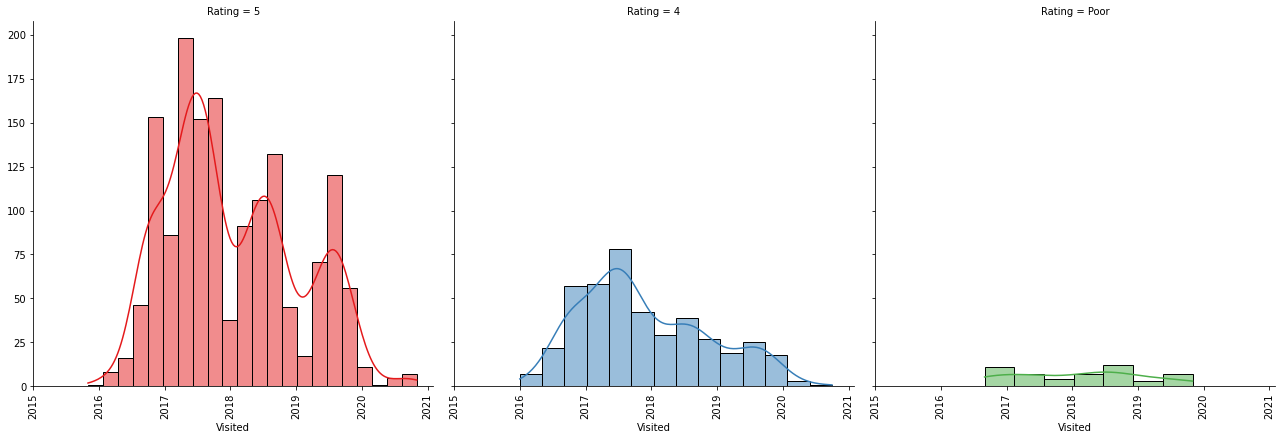

In [332]:
visited_grid_5 = sns.FacetGrid(data=ta_5vspoor_5_df, col='Rating', hue="Rating", palette="Set1", height=6, aspect=1,
                             col_order=ta_chng_rat.Rating.value_counts().index)

visited_grid_5.map(sns.histplot, "Visited", kde=True)

visited_grid_5.set_xticklabels(rotation='vertical', fontsize=10)

## Analyzing 5 star reviews on specific month and year

In [190]:
ta_5vspoor_date = ta_5vspoor[ta_5vspoor['Visited']=='2019-01-01']

corpus_5star_date = ' '.join(ta_5vspoor_date[ta_5vspoor_date['Rating']==5]['Text']).lower()
tokens_5star_date = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_5star_date) if tokens not in stop_filters]

bigram_5star_date = list(nltk.bigrams(tokens_5star_date))
fdist_bi_5star_date = FreqDist(bigram_5star_date)
fdist_bi_5star_date.most_common(10)

[(('well', 'worth'), 8),
 (('ansel', 'adam'), 8),
 (('highly', 'recommend'), 6),
 (('tea', 'party'), 5),
 (('fenway', 'park'), 5),
 (('museum', 'fine'), 4),
 (('fine', 'art'), 4),
 (('historical', 'site'), 3),
 (('great', 'tour'), 3),
 (('tour', 'guide'), 3)]

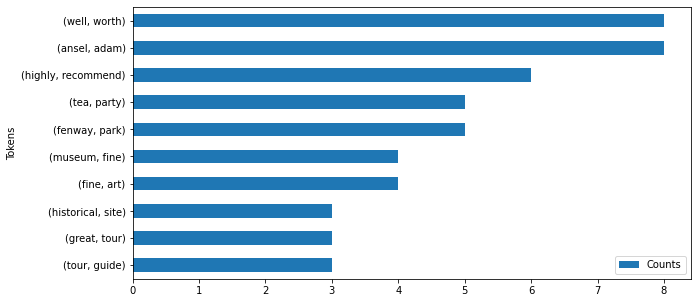

In [191]:
# Graph of 5 Star Bigram

fdist_bi_5star_date_graph = pd.DataFrame(fdist_bi_5star_date.most_common(10),
                                    columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_bi_5star_date_graph.invert_yaxis()

In [192]:
from textblob import TextBlob

sample_size = len(ta_5vspoor_date.Attraction)

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

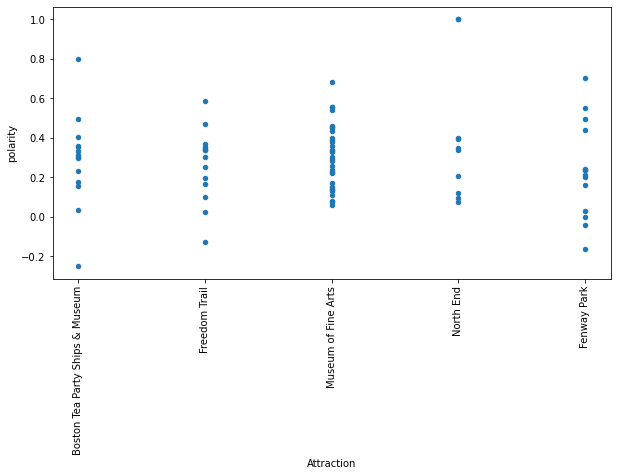

In [193]:
sample = ta_5vspoor_date.sample(sample_size).apply(sentiment_func, axis=1)
sample.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

- Analyzing all reviews on specific month and year

In [194]:
ta_date = ta_5vspoor[ta_5vspoor['Visited']=='2019-01-01']

In [195]:
corpus_date = ' '.join(ta_date['Text']).lower()
tokens_date = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_date) if tokens not in stop_filters]

bigram_date = list(nltk.bigrams(tokens_date))
fdist_bi_date = FreqDist(bigram_date)
fdist_bi_date.most_common(20)

[(('ansel', 'adam'), 9),
 (('well', 'worth'), 8),
 (('highly', 'recommend'), 6),
 (('tea', 'party'), 6),
 (('paul', 'revere'), 5),
 (('freedom', 'trail'), 5),
 (('fenway', 'park'), 5),
 (('fine', 'art'), 5),
 (('much', 'see'), 4),
 (('see', 'everything'), 4),
 (('great', 'place'), 4),
 (('museum', 'fine'), 4),
 (('north', 'end'), 4),
 (('throw', 'tea'), 3),
 (('ship', 'museum'), 3),
 (('historical', 'site'), 3),
 (('fun', 'way'), 3),
 (('definitely', 'worth'), 3),
 (('take', 'tour'), 3),
 (('great', 'tour'), 3)]

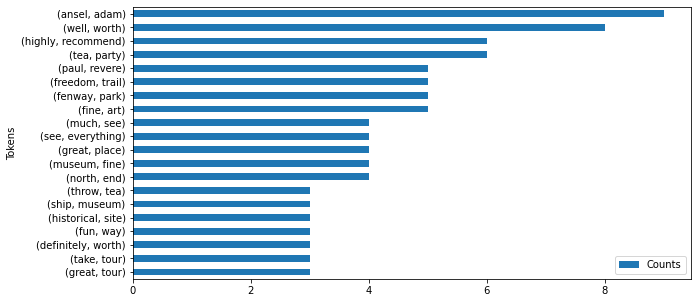

In [196]:
fdist_bi_date_graph = pd.DataFrame(fdist_bi_date.most_common(20),
                                    columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_bi_date_graph.invert_yaxis()

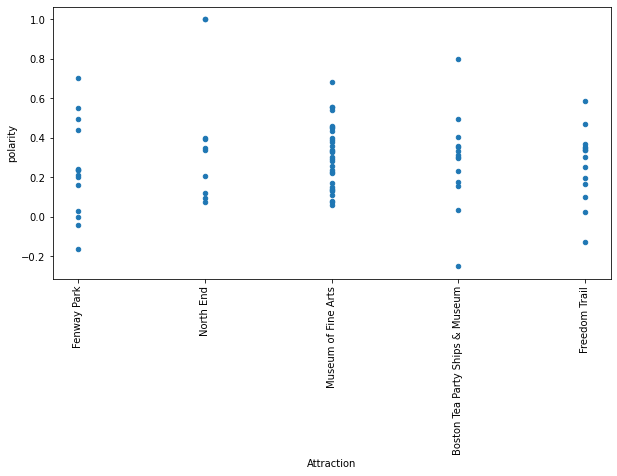

In [197]:
from textblob import TextBlob

sample_size = len(ta_date.Attraction)

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

sample = ta_date.sample(sample_size).apply(sentiment_func, axis=1)
sample.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

# User Location-Based Analysis

In [198]:
user_loc_df = tripadv[(tripadv['City']=='Boston') &
                     (tripadv['User_Loc2']!='')]
user_loc_agg_df = user_loc_df.groupby('User_Loc2')['Rating'].agg(['count', 'mean', 'std'])
user_loc_agg_df

,count,mean,std
User_Loc2,,,
GREECE,1,4.000000,NaN
AB,1,5.000000,NaN
AK,8,4.750000,0.462910
AL,58,4.775862,0.531238
ALBERTA,3,5.000000,0.000000
...,...,...,...
WI,79,4.658228,0.677213
WI,1,5.000000,NaN
WV,16,4.875000,0.341565


In [199]:
user_loc_agg_df_10 = user_loc_agg_df[user_loc_agg_df['count']>=10].sort_values('mean', ascending = False)
user_loc_agg_df_10.head(5)

,count,mean,std
User_Loc2,,,
WV,16,4.875000,0.341565
OK,40,4.825000,0.446496
SD,17,4.823529,0.392953
COLOMBIA,11,4.818182,0.404520
NJ,124,4.798387,0.493533


In [200]:
user_loc_agg_df_10.tail(5)

,count,mean,std
User_Loc2,,,
INDIA,46,4.543478,0.545956
ISRAEL,18,4.500000,0.857493
THE NETHERLANDS,30,4.466667,0.628810
SPAIN,16,4.437500,0.813941
SOUTH AFRICA,11,4.000000,1.000000


# Use States or 10 most common locations

In [201]:
ta_loc_1 = user_loc_df[(user_loc_df['User_Loc2']=='WV') |
                       (user_loc_df['User_Loc2']=='OK') |
                       (user_loc_df['User_Loc2']=='SD') |
                       (user_loc_df['User_Loc2']=='COLOMBIA') |
                       (user_loc_df['User_Loc2']=='nj')]
ta_loc_1.sample(20)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
27239,Fenway Park,Boston,2019-05-01,2019-05-01,75,25,1,5,Historic place in the city. Went with my wife ...,Fenway tour,Mauricio ZS,BARRANQUILLA,COLOMBIA,,,
27245,Fenway Park,Boston,2019-05-01,2018-06-01,68,1,0,4,I loved the experience of being in a Red Sox G...,Red Sox are awesome.,Ana Cristina Tobón,MEDELLIN,COLOMBIA,,,
28029,Fenway Park,Boston,2019-09-01,2019-09-01,375,28,0,5,We had no plans on going to a Red Socks game b...,Historic ⚾️,Courtney B,EDMOND,OK,,,
26788,Fenway Park,Boston,2018-10-01,2018-10-01,121,71,0,5,Fenway has so much history and friendly fans t...,We may live in WV but we keep our Sox in Boston,WVMaven,LEWISBURG,WV,,,
27623,Fenway Park,Boston,2019-07-01,2019-07-01,147,44,1,5,Going to Fenway was a MUST for my baseball fan...,Not just for baseball fans,travelinfamsd,SIOUX FALLS,SD,,,
23653,Boston Tea Party Ships & Museum,Boston,2018-08-01,2018-07-01,17,3,0,5,We were a little taken back by the entrance fe...,Well worth the money!,Cassi B,MARTINSBURG,WV,,,
19181,Freedom Trail,Boston,2018-10-01,2018-10-01,35,5,0,5,We had a personal guide that gave us a very in...,Very informative.,George W,BROKEN ARROW,OK,,,
22250,Museum of Fine Arts,Boston,2019-04-01,2019-04-01,438,88,0,5,We came during the free hours. It is a great M...,free on Wednesday after 4.,leojtracnik,RAPID CITY,SD,,,
19939,Freedom Trail,Boston,2019-07-01,2019-07-01,57,8,0,5,I’m so glad we got to do the tour with “Judith...,Anna “Judith” brought it to life!!!,DeeAnnaPete,WATERTOWN,SD,,,
25257,North End,Boston,2017-08-01,2017-07-01,107,31,0,5,The North End is full of history with so much ...,"History, History, History",happytobeatraveler0810,MOUNT LOOKOUT,WV,,,


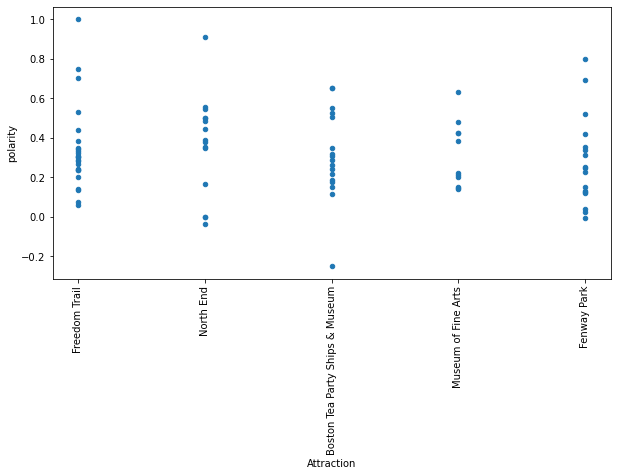

In [202]:
from textblob import TextBlob

sample_size = len(ta_loc_1.Attraction)

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

sample = ta_loc_1.sample(sample_size).apply(sentiment_func, axis=1)
sample.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

In [203]:
corpus_loc_1 = ' '.join(ta_loc_1['Text']).lower()
tokens_loc_1 = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_loc_1) if tokens not in stop_filters]

bigram_loc_1 = list(nltk.bigrams(tokens_loc_1))
fdist_bi_loc_1 = FreqDist(bigram_loc_1)
fdist_bi_loc_1.most_common(10)

[(('freedom', 'trail'), 11),
 (('tea', 'party'), 10),
 (('tour', 'guide'), 9),
 (('north', 'end'), 9),
 (('red', 'sox'), 5),
 (('baseball', 'fan'), 5),
 (('red', 'brick'), 5),
 (('history', 'lesson'), 4),
 (('great', 'tour'), 4),
 (('green', 'monster'), 4)]

In [204]:
trigram_loc_1 = list(nltk.trigrams(tokens_loc_1))
fdist_tri_loc_1 = FreqDist(trigram_loc_1)
fdist_tri_loc_1.most_common(10)

[(('paul', 'revere', 'house'), 3),
 (('time', 'tea', 'party'), 2),
 (('tea', 'party', 'ship'), 2),
 (('party', 'ship', 'museum'), 2),
 (('great', 'place', 'visit'), 2),
 (('last', 'minute', 'ticket'), 2),
 (('red', 'sox', 'fan'), 2),
 (('tour', 'guide', 'knowledgeable'), 2),
 (('great', 'tour', 'guide'), 2),
 (('old', 'north', 'church'), 2)]

In [205]:
ta_loc_2 = user_loc_df[(user_loc_df['User_Loc2']=='INDIA') |
                       (user_loc_df['User_Loc2']=='ISRAEL') |
                       (user_loc_df['User_Loc2']=='THE NETHERLANDS') |
                       (user_loc_df['User_Loc2']=='SPAIN') |
                       (user_loc_df['User_Loc2']=='SOUTH AFRICA')]
ta_loc_2.sample(20)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
22496,Museum of Fine Arts,Boston,2019-11-01,2019-10-01,19,1,0,5,Great visit to Boston Museum of Fine Arts. Due...,Something for every art enthusiast,Geoff N,EINDHOVEN,THE NETHERLANDS,,,
24918,North End,Boston,2017-04-01,2017-04-01,986,193,0,5,"With a nice history, delectable food and neat ...",Interesting!,DipuKV,PUNE,INDIA,,,
20250,Freedom Trail,Boston,2019-09-01,2019-09-01,119,29,1,4,Its a great way to see the city. The walk isnt...,Great city walk,sanderdijk,BERKEL EN RODENRIJS,THE NETHERLANDS,,,
26474,Fenway Park,Boston,2018-08-01,2018-08-01,54,17,0,5,Everyone needs to attend Fenway park once in t...,Famous Green Monster,unwindwithspa,EINDHOVEN,THE NETHERLANDS,,,
19428,Freedom Trail,Boston,2019-01-01,2018-10-01,22,3,0,4,The freedom trail is a must for any visit to B...,Fun and Informative!,Gustav d,JOHANNESBURG,SOUTH AFRICA,,,
19945,Freedom Trail,Boston,2019-07-01,2018-09-01,29,17,0,5,Enjoyed this trail even though at the time my ...,A worthy experience,Josette M,CAPE TOWN CENTRAL,SOUTH AFRICA,,,
26530,Fenway Park,Boston,2018-09-01,2018-08-01,56,7,0,4,I'm not a baseball fan but really enjoyed the ...,Great vibes!,danielj1004,VELSERBROEK,THE NETHERLANDS,,,
20490,Freedom Trail,Boston,2019-12-01,2019-09-01,"2,539",314,1,5,A must do experience..You can learn about the ...,Best way to see Boston,Gopinath Prabhu,BELTHANGADY,INDIA,,,
23396,Boston Tea Party Ships & Museum,Boston,2018-04-01,2018-04-01,84,25,0,5,This isn't your typical museum! From the momen...,A fun and interactive experience,EmilyR44,PUNE,INDIA,,,
23463,Boston Tea Party Ships & Museum,Boston,2018-06-01,2018-05-01,165,35,0,4,"We had heard a lot about this attraction, henc...",peek into history,historycling,CHANDIGARH,INDIA,,,


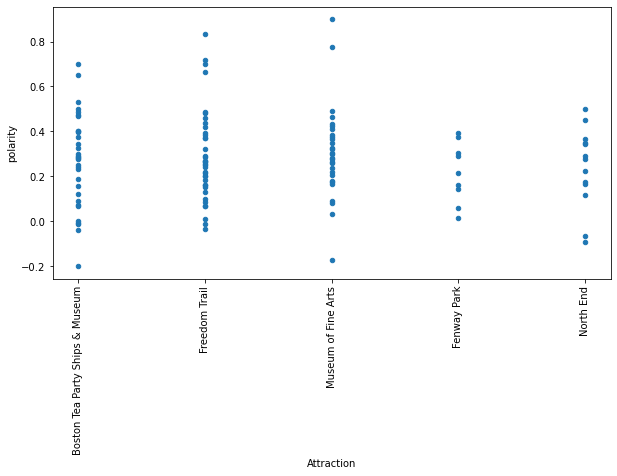

In [206]:
from textblob import TextBlob

sample_size = len(ta_loc_2.Attraction)

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

sample = ta_loc_2.sample(sample_size).apply(sentiment_func, axis=1)
sample.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

- We might be seeing that the reason why there are so many positive reviews in the top 5 count is that a lot of them went to Fenway
- we might want to consider how we market to different groups based on these grams

In [207]:
corpus_loc_2 = ' '.join(ta_loc_2['Text']).lower()
tokens_loc_2 = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_loc_2) if tokens not in stop_filters]

bigram_loc_2 = list(nltk.bigrams(tokens_loc_2))
fdist_bi_loc_2 = FreqDist(bigram_loc_2)
fdist_bi_loc_2.most_common(10)

[(('freedom', 'trail'), 16),
 (('tea', 'party'), 13),
 (('north', 'end'), 6),
 (('bunker', 'hill'), 5),
 (('american', 'history'), 4),
 (('history', 'city'), 4),
 (('along', 'trail'), 4),
 (('learn', 'history'), 4),
 (('museum', 'fine'), 4),
 (('fine', 'art'), 4)]

In [208]:
trigram_loc_2 = list(nltk.trigrams(tokens_loc_2))
fdist_tri_loc_2 = FreqDist(trigram_loc_2)
fdist_tri_loc_2.most_common(10)

[(('museum', 'fine', 'art'), 4),
 (('place', 'history', 'lover'), 2),
 (('must', 'visit', 'place'), 2),
 (('along', 'freedom', 'trail'), 2),
 (('freedom', 'trail', 'pass'), 2),
 (('bunker', 'hill', 'monument'), 2),
 (('learn', 'history', 'city'), 2),
 (('see', 'botticelli', 'exhibition'), 2),
 (('beautiful', 'peek', 'historic'), 1),
 (('peek', 'historic', 'tea'), 1)]

# Analysis of Review Text Polarity of the 20 most helpful users

In [581]:
helpful_users = ta_5vspoor.sort_values(by=['User_Helpful'], ascending = False).head(20)
helpful_users['Username'] = helpful_users['Username'].astype(str)
helpful_users

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
22139,Museum of Fine Arts,Boston,2019-01-01,2018-12-01,"4,905",988,0,5,"To be honest, it was not a planned visit and w...",Wonderful surprise,Dirk W,ALEXANDRA HEADLAND,AUSTRALIA,,,
20974,Museum of Fine Arts,Boston,2017-05-01,2017-04-01,"5,762",987,0,5,In addition to seeing the Art in Bloom display...,Another lovely Art in Bloom!,Nikko4Me,MILFORD,MA,,,
19426,Freedom Trail,Boston,2019-01-01,2018-12-01,"4,905",987,0,4,"Just follow the red brick road, you cannot go ...",Boston best,Dirk W,ALEXANDRA HEADLAND,AUSTRALIA,,,
27259,Fenway Park,Boston,2019-05-01,2019-05-01,"9,552",973,0,5,I was here for an afternoon game. The weather ...,Great park.,LostALot22,CHICAGO,IL,,,
21284,Museum of Fine Arts,Boston,2017-08-01,2017-05-01,"1,038",949,0,4,My spouse and I visited Boston’s Museum of Fin...,Great Permanent Collection and Nice Rotating E...,fluffnfold,PENNSYLVANIA,,,,
23175,Boston Tea Party Ships & Museum,Boston,2017-10-01,2017-10-01,"1,725",919,0,4,This is a great way to get children interested...,Good experience,Sunset92,BROOKLYN,NY,,,
25490,North End,Boston,2017-11-01,2017-10-01,"3,284",917,0,5,It's a beautiful place with great Italian rest...,Maybe the best Little italy in the US,RonL40,UTICA,NY,,,
34559,Museum of Fine Arts,Boston,2017-06-01,2017-06-01,"3,284",917,0,5,"Loved the Matisse, Botticelli and African-Amer...",Beautiful permanent collection. Great Matisse ...,RonL40,UTICA,NY,,,
19642,Freedom Trail,Boston,2019-05-01,2019-05-01,"2,559",904,0,5,The Freedom Trail takes you to about 17 sites ...,Walk it,lucycan,MINNEAPOLIS,MN,,,
26158,North End,Boston,2019-05-01,2019-05-01,"2,559",904,0,5,This is the area to the north of the 93 highwa...,Great area,lucycan,MINNEAPOLIS,MN,,,


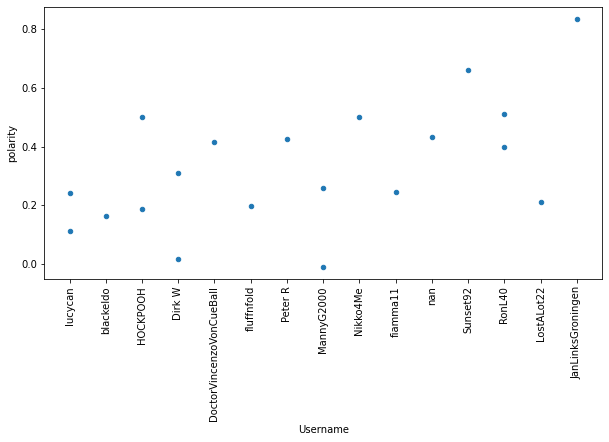

In [587]:
from textblob import TextBlob

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

sample = helpful_users.sample(20).apply(sentiment_func, axis=1)
sample.plot.scatter('Username', 'polarity').tick_params(axis='x', labelrotation = 90)

In [583]:
helpful_users_condensed = helpful_users[helpful_users.columns[[10, 5, 0, 8]]]
helpful_users_condensed

,Username,User_Helpful,Attraction,Text
22139,Dirk W,988,Museum of Fine Arts,"To be honest, it was not a planned visit and w..."
20974,Nikko4Me,987,Museum of Fine Arts,In addition to seeing the Art in Bloom display...
19426,Dirk W,987,Freedom Trail,"Just follow the red brick road, you cannot go ..."
27259,LostALot22,973,Fenway Park,I was here for an afternoon game. The weather ...
21284,fluffnfold,949,Museum of Fine Arts,My spouse and I visited Boston’s Museum of Fin...
23175,Sunset92,919,Boston Tea Party Ships & Museum,This is a great way to get children interested...
25490,RonL40,917,North End,It's a beautiful place with great Italian rest...
34559,RonL40,917,Museum of Fine Arts,"Loved the Matisse, Botticelli and African-Amer..."
19642,lucycan,904,Freedom Trail,The Freedom Trail takes you to about 17 sites ...
26158,lucycan,904,North End,This is the area to the north of the 93 highwa...


### Dirk W's Reviews and polarity assessment

In [590]:
print(helpful_users_condensed.loc[22139, 'Attraction'])
helpful_users_condensed.loc[22139, 'Text']

Museum of Fine Arts


"To be honest, it was not a planned visit and we only learned about this Museum whilst in Boston (the fact that it was free entry from 4pm that day encouraged us even more). But, boy, are we glad we went there ! What a great surprise to find such a huge collection of Dutch Golden Age and French impressionists ! Being European tourists, that's where we spent all of our time ; but we learned later that the American Art displays are even more impressive. So much splendid art, so little time . . . next time, for sure."

In [591]:
print(helpful_users_condensed.loc[19426, 'Attraction'])
helpful_users_condensed.loc[19426, 'Text']

Freedom Trail


"Just follow the red brick road, you cannot go wrong. We walked it several times on our way from Boston Common to a restaurant around Faneuil Hall. Then finally we bought tickets for the guided tour from the kiosk in Boston Common and joined a small group of about 8 people. The tour guide was most informative and entertaining : at $ 12 per person it is a small investment to learn heaps about an important period of Boston's (and America's !) history in a fun way."